In [1]:
! pip install pandas
! pip install xlrd
! pip install seaborn
! pip install matplotlib
! pip install numpy
! pip install scikit-learn
! pip install scipy
! pip install openpyxl
! pip install adjdatatools
! pip install networkx
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Выполнили: Бараненков Сергей, Ботайбеков Ассет

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
import numpy as np

##  Домашнее задание 2: алгоритмы кластерного анализа
Провести необходимые вычисления. Полученные результаты снабдить подробным
комментарием.

**Цель работы**: выполнить кластерный анализ данных. Провести сравнение различных
алгоритмов кластеризации.  Объяснить результаты.

**Данные**: в каждом варианте два набора данных X_4_i и  Y_4_i (i – номер варианта). Данные
представляют собой векторы-строки в пространстве R4.

### Выполнить первичную обработку данных. Сделать первые выводы.

Загружаем датасеты

In [3]:
columns = ['col_1', 'col_2', 'col_3', 'col_4']

In [4]:
x_df = pd.read_excel('resources/X_4_7.xlsx', names=columns, header=None)
y_df = pd.read_excel('resources/Y_4_7.xlsx', names=columns, header=None)

In [5]:
display(x_df.info())
display(y_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_1   200 non-null    float64
 1   col_2   200 non-null    float64
 2   col_3   200 non-null    float64
 3   col_4   200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_1   200 non-null    float64
 1   col_2   200 non-null    float64
 2   col_3   200 non-null    float64
 3   col_4   200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

Заметим, что пропущенных значений нет

Построим графики распределений

In [6]:
def plot_distributions(data_frame, plot_cols = 3, bins = 20):
    df_col_len = len(data_frame.columns)
    plot_rows = math.ceil(df_col_len / plot_cols)
    fig, axes = plt.subplots(plot_rows, plot_cols, sharex='none', sharey='none')
    fig.set_size_inches(26, 10)
    for i, column in enumerate(data_frame.columns):
        if plot_rows == 1:
            ax = axes[i % plot_cols]
        else:
            ax = axes[math.floor(i / plot_cols)][i % plot_cols]
        sns.histplot(
            data_frame[column],
            ax = ax,
            kde=True,
            stat = 'density',
            bins=bins,
            kde_kws=dict(cut=3)
        )
        ax.axvline(data_frame[column].mean(), c='k', ls='-', lw=2.5)
        ax.axvline(data_frame[column].median(), c='orange', ls='--', lw=2.5)

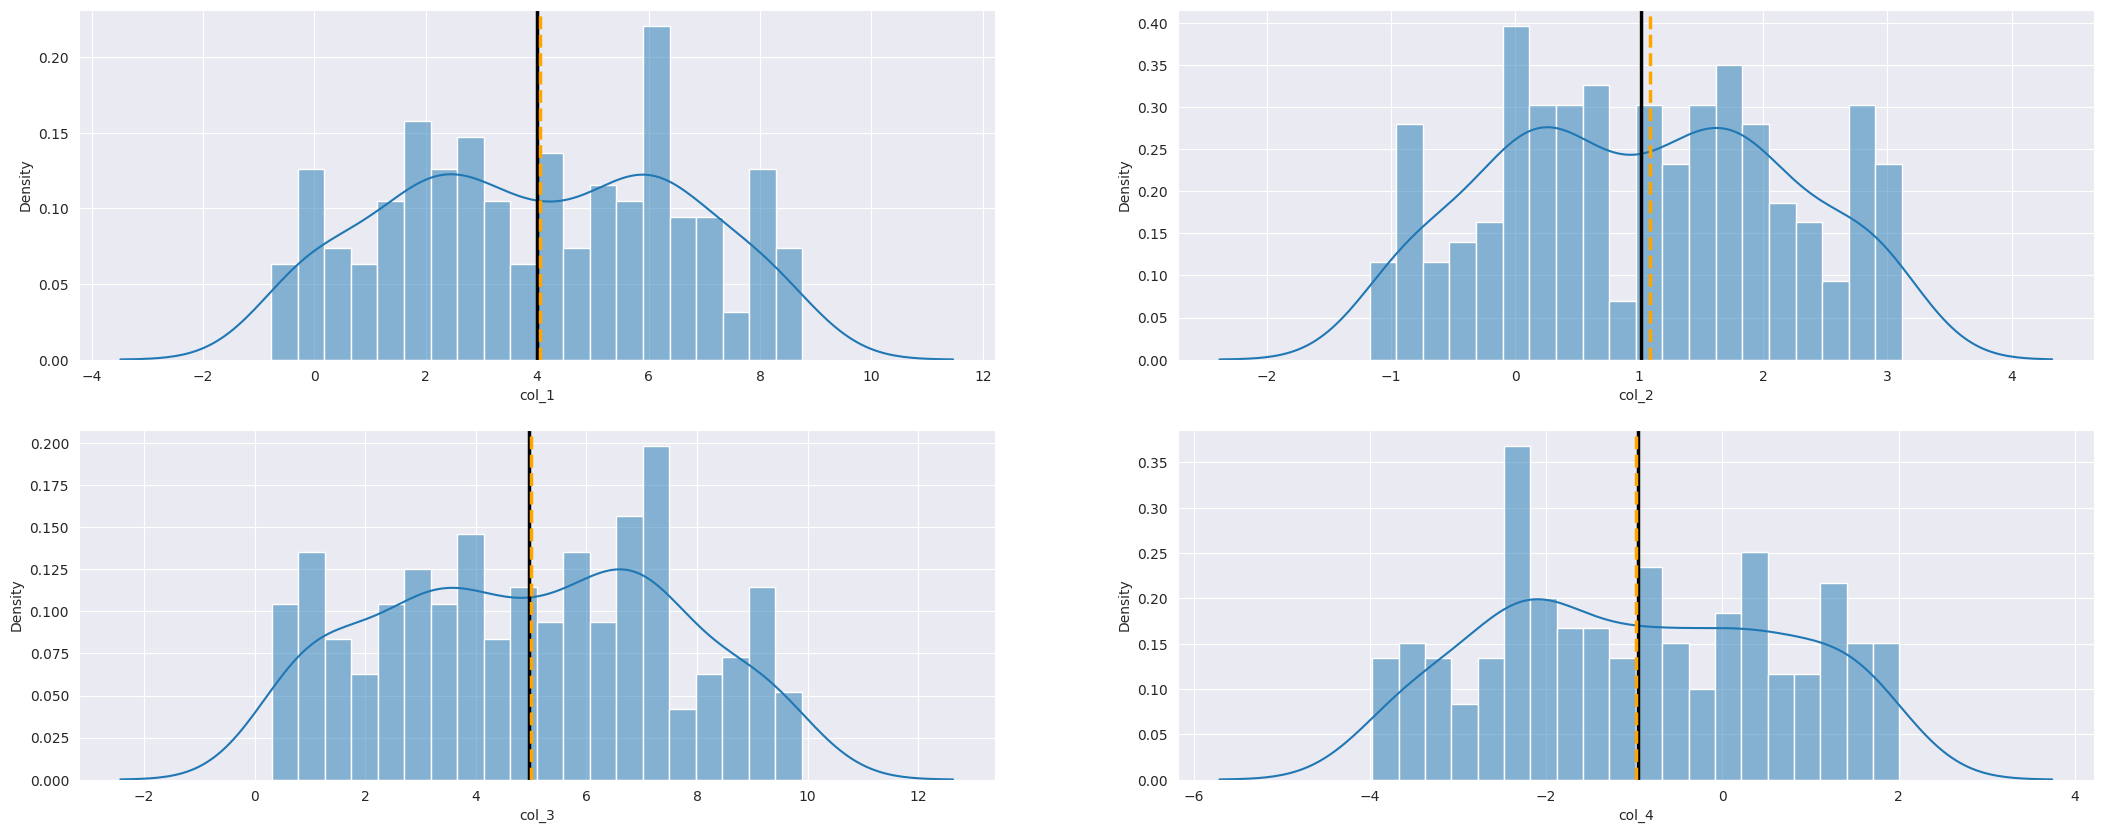

In [7]:
plot_distributions(x_df, plot_cols=2)

Предварительно можем сделать вывод, что все 4 признака имеют отличное от нормального распределение (скорее всего распределение гребенчатого типа)

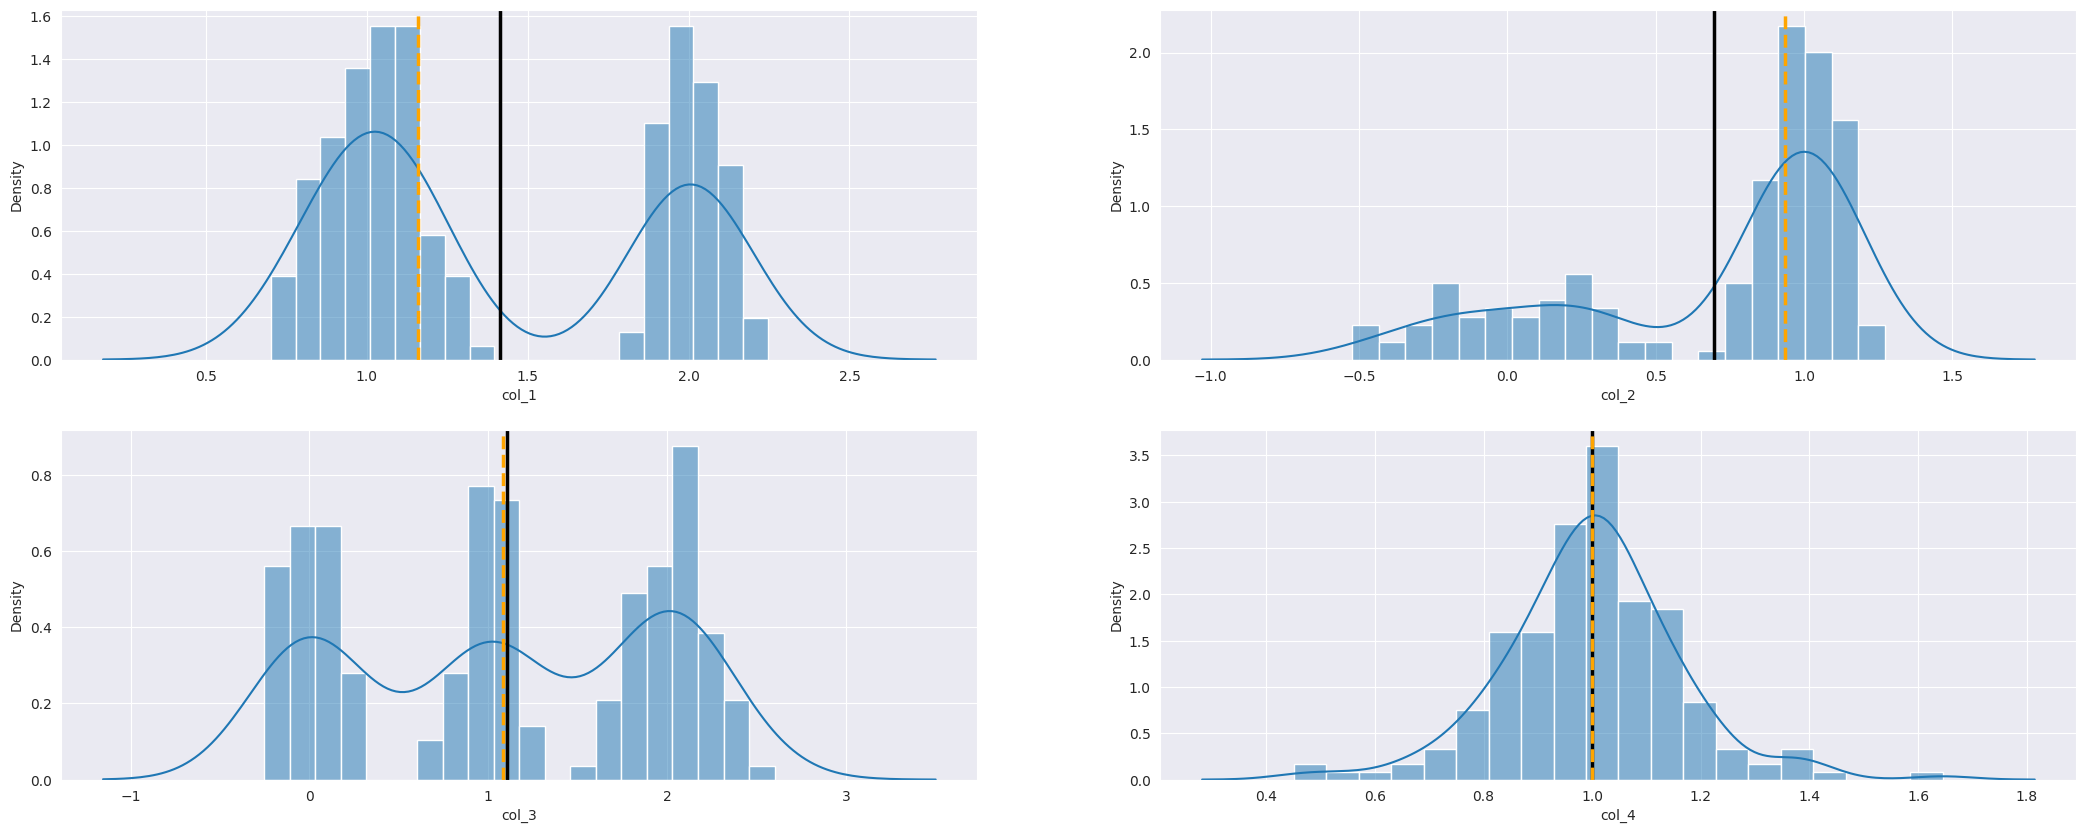

In [8]:
plot_distributions(y_df, plot_cols=2)

Предварительно в признаках col1 и col3 видим смесь нескольких нормальных распределений с разными средними значениями, но похожими дисперсиями.

Признак col2 также содержит смесь двух распределений, причем левая часть напоминает равномерное распределение, а правая 0 нормальное.

Признак col4 представляет собой нормальное не скошенное распределение.

Рассмотрим матрицы корреляций

<AxesSubplot: >

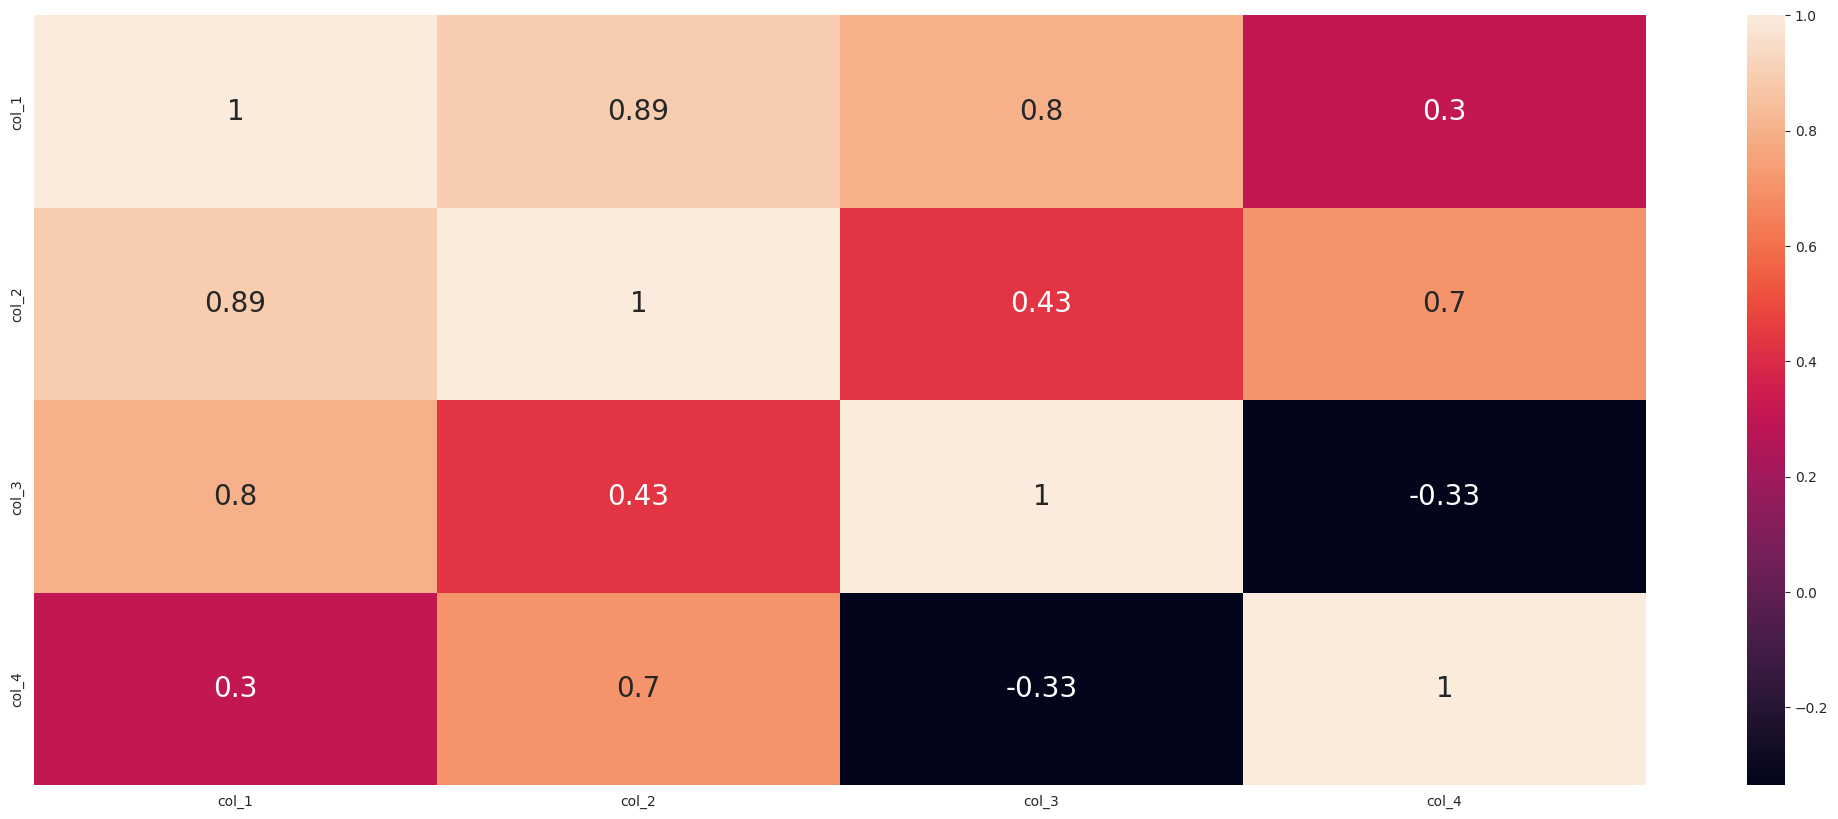

In [9]:
plt.figure(figsize=(26,10))
sns.heatmap(x_df.corr(), annot=True, annot_kws={'size': 20})

Видим что признак 1 сильно прямо коррелирует с признаками 2 и 3, а признак 2 сильно коррелирует с признаком 4

<AxesSubplot: >

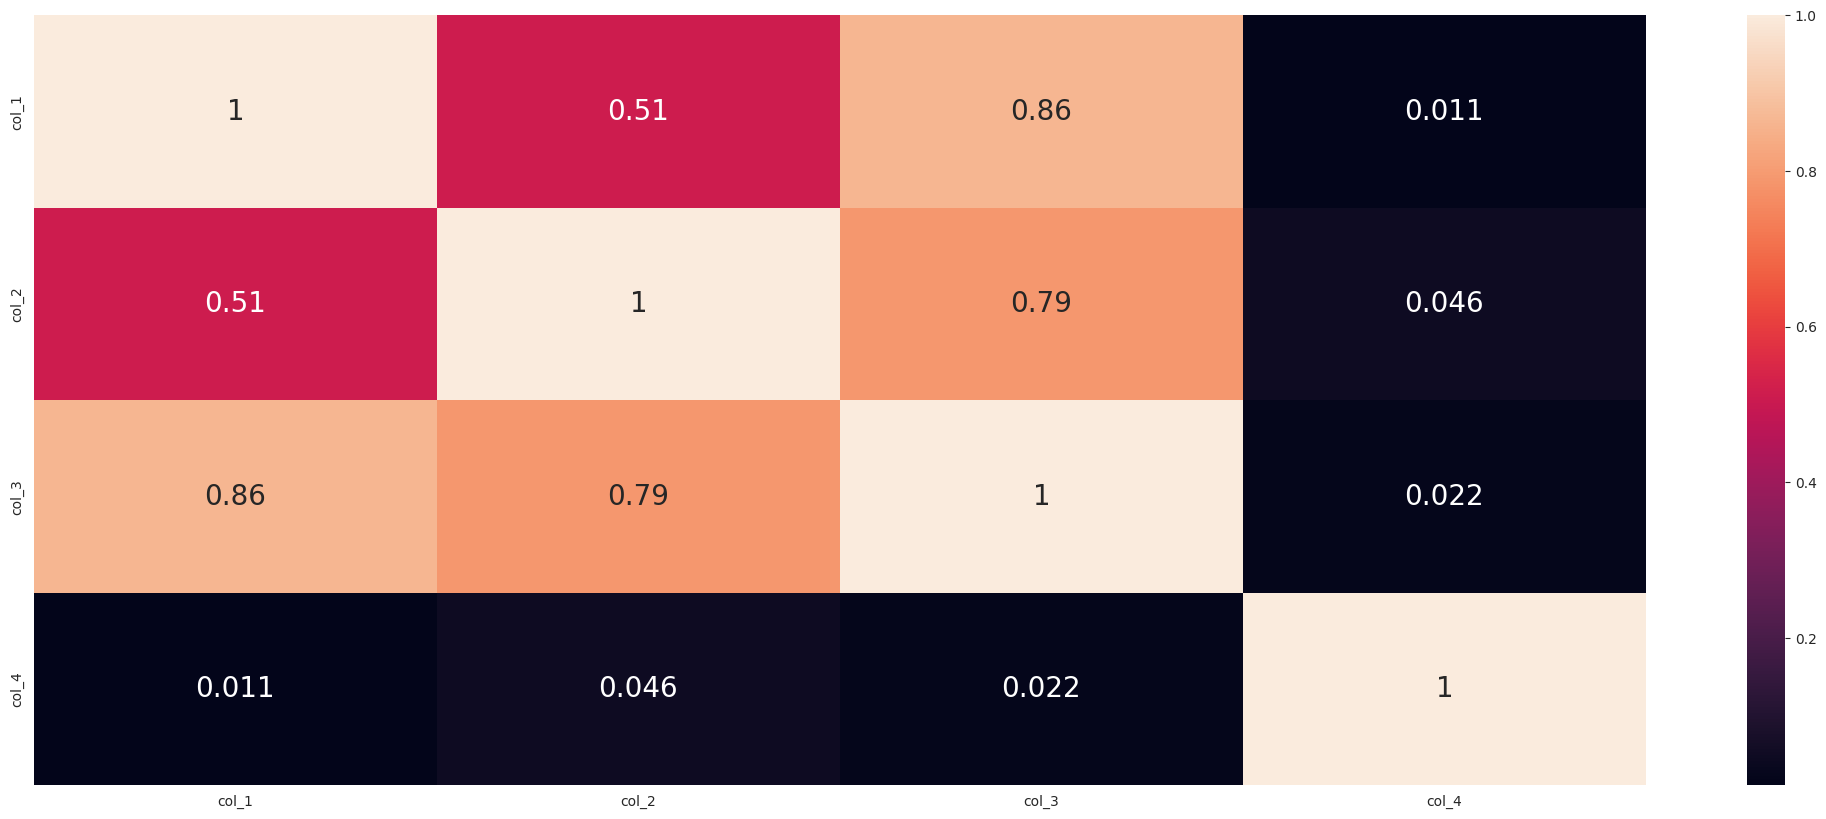

In [10]:
plt.figure(figsize=(26,10))
sns.heatmap(y_df.corr(), annot=True, annot_kws={'size': 20})

In [11]:
from itertools import combinations
def plot_3D(df, plot_rows, plot_cols = 2, colors = 'red', angle=(0,0)):
    fig, axes = plt.subplots(plot_rows, plot_cols, sharex='none', sharey='none', subplot_kw=dict(projection='3d'))
    fig.set_size_inches(26, 10)
    for i, (x_col, y_col, z_col) in enumerate(combinations(df.columns, 3)):
        if plot_rows == 1 and plot_cols == 1:
            ax = axes
        elif plot_rows == 1 or plot_cols == 1:
            ax = axes[i % plot_cols]
        else:
            ax = axes[math.floor(i / plot_cols)][i % plot_cols]

        ax.scatter3D(df[x_col], df[y_col], df[z_col], c=colors, cmap='plasma')
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_zlabel(z_col)
        ax.view_init(*angle)

/tmp/ipykernel_8571/1292065292.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(df[x_col], df[y_col], df[z_col], c=colors, cmap='plasma')


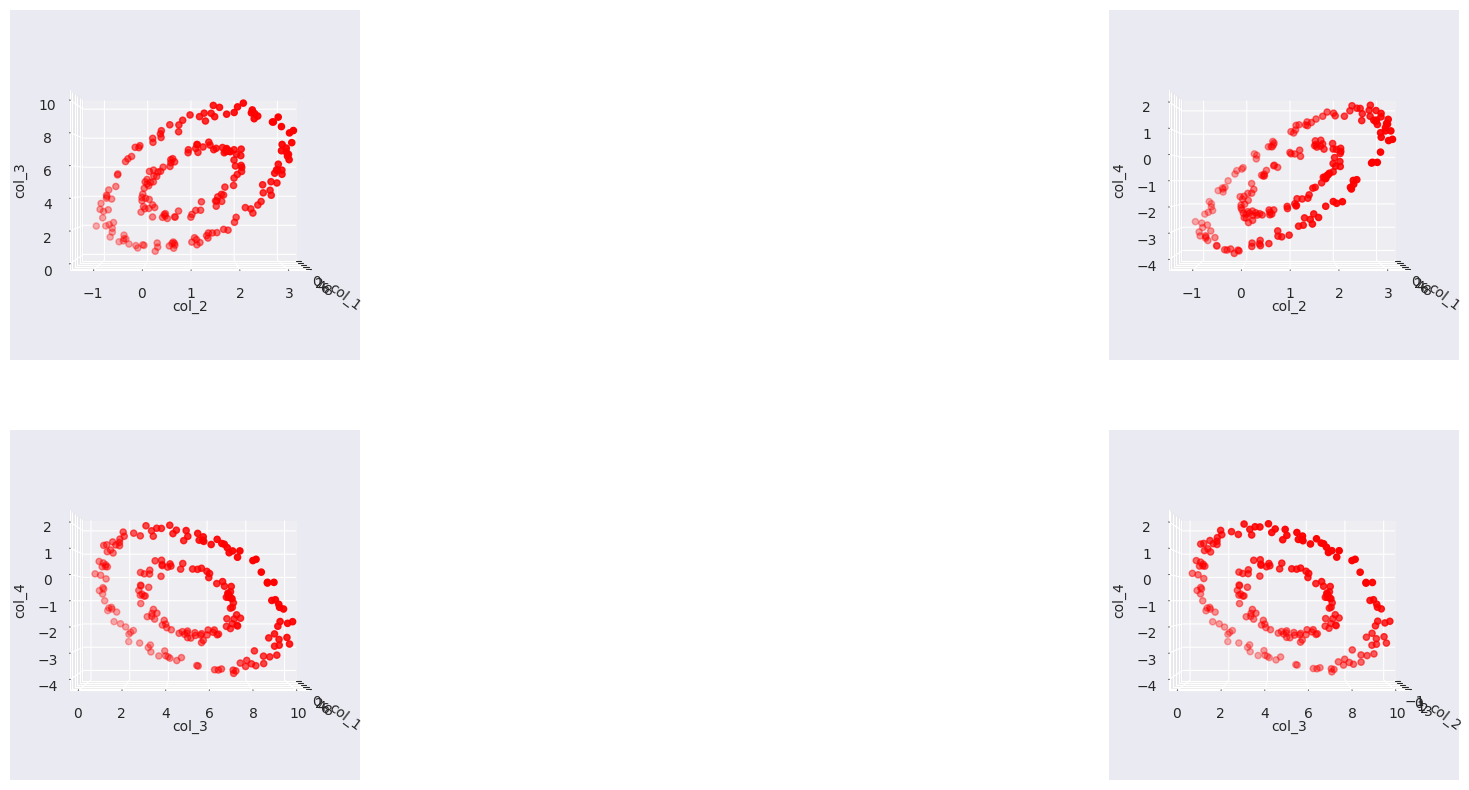

In [12]:
plot_3D(x_df, 2, plot_cols=2)

Видим, что данные из датасета X имеют четкую кластерную структуру (2 вложенных кольца). Предполагаемое число кластеров = 2

/tmp/ipykernel_8571/1292065292.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(df[x_col], df[y_col], df[z_col], c=colors, cmap='plasma')


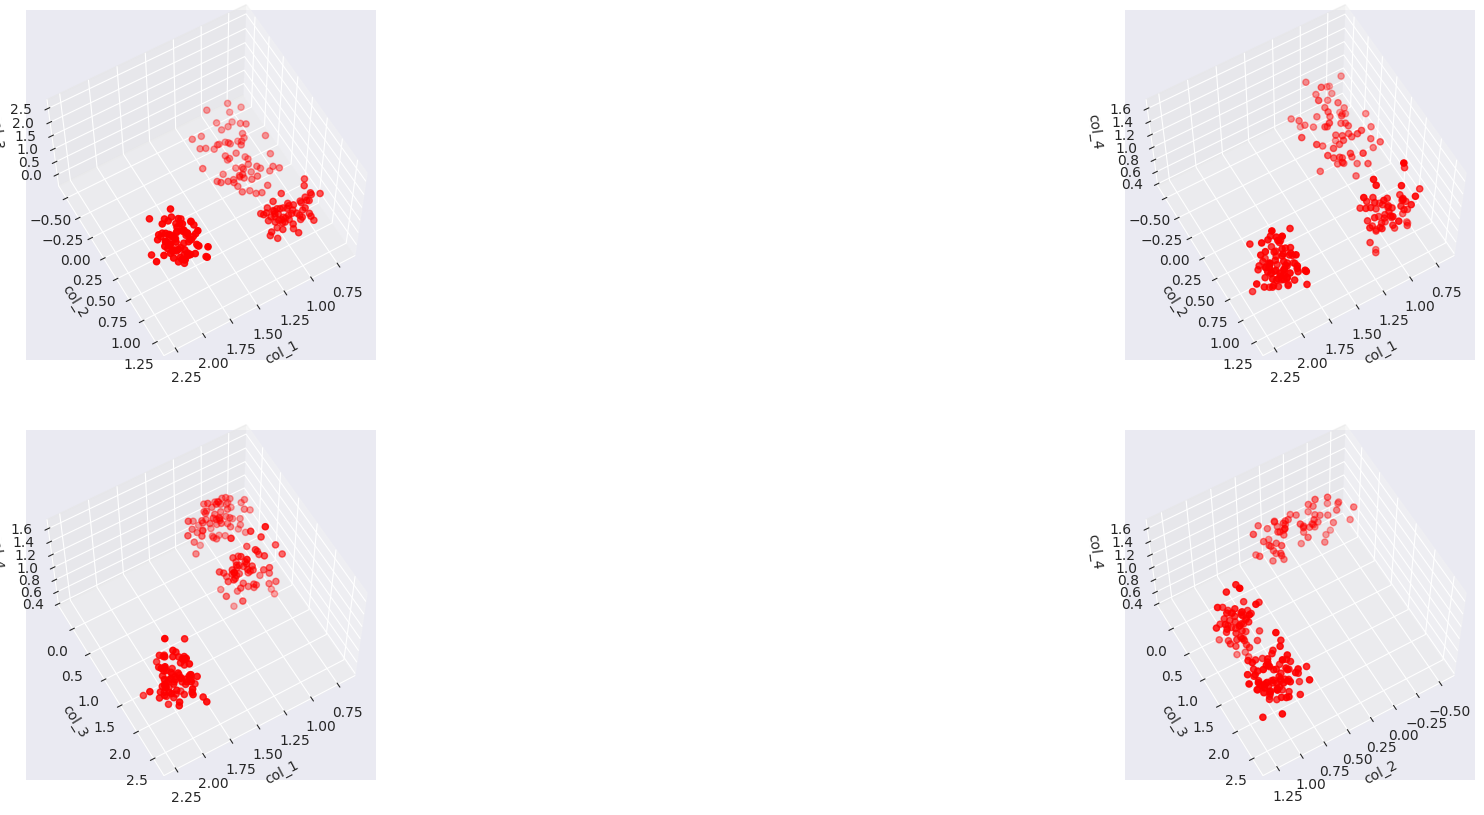

In [13]:
plot_3D(y_df, 2, plot_cols=2, angle=(60, 60))

В данных Y можно наблюдать 3 кластера, представляющих собой скученные группы точек

### Нормировка и центрирование данных

Для правильной работы алгоритмов кластеризации (корректного определения расстояний / similarity) необходимо нормализовать и отцентрировать данные. Так как признаки обоих датасетов имеют разные распределения, в том числе не симметричные, применим умную нормализацию, описанную в статье https://habr.com/ru/post/527334/

In [14]:
from adjdatatools.preprocessing import AdjustedScaler

new_scaler = AdjustedScaler(with_centering=True)
new_scaler.fit(x_df)
x_df = new_scaler.transform(x_df)

In [15]:
new_scaler = AdjustedScaler(with_centering=True)
new_scaler.fit(y_df)
y_df = new_scaler.transform(y_df)

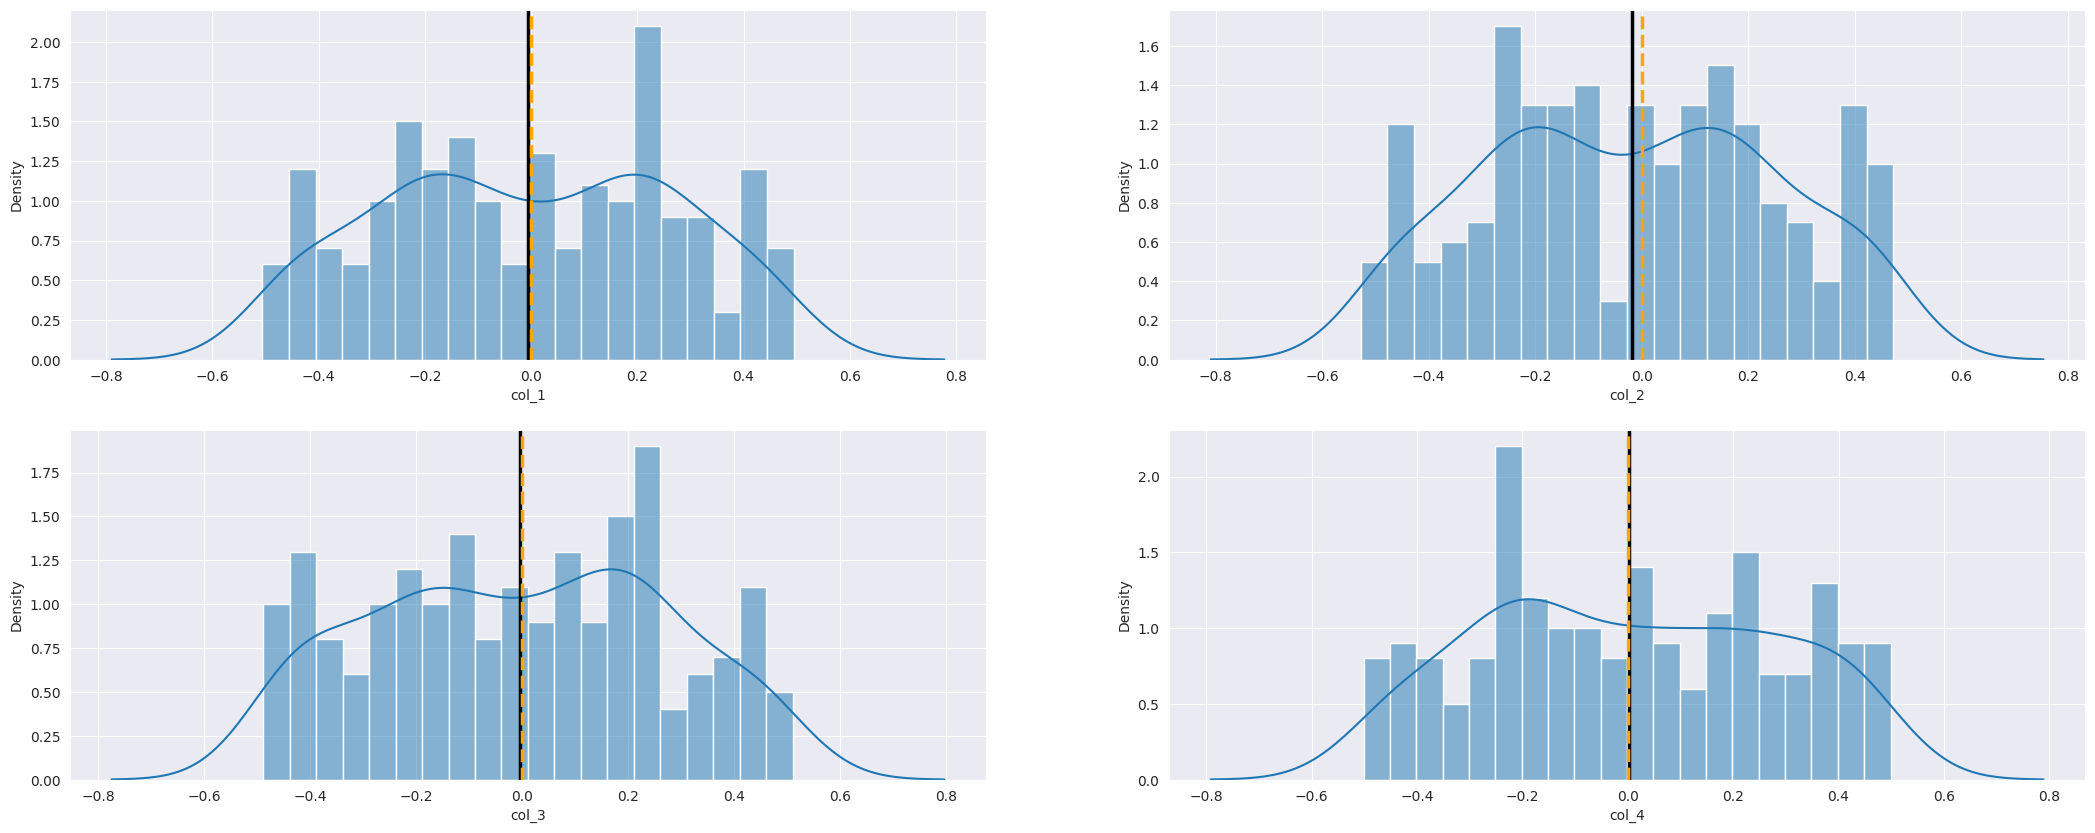

In [16]:
plot_distributions(x_df, plot_cols=2)

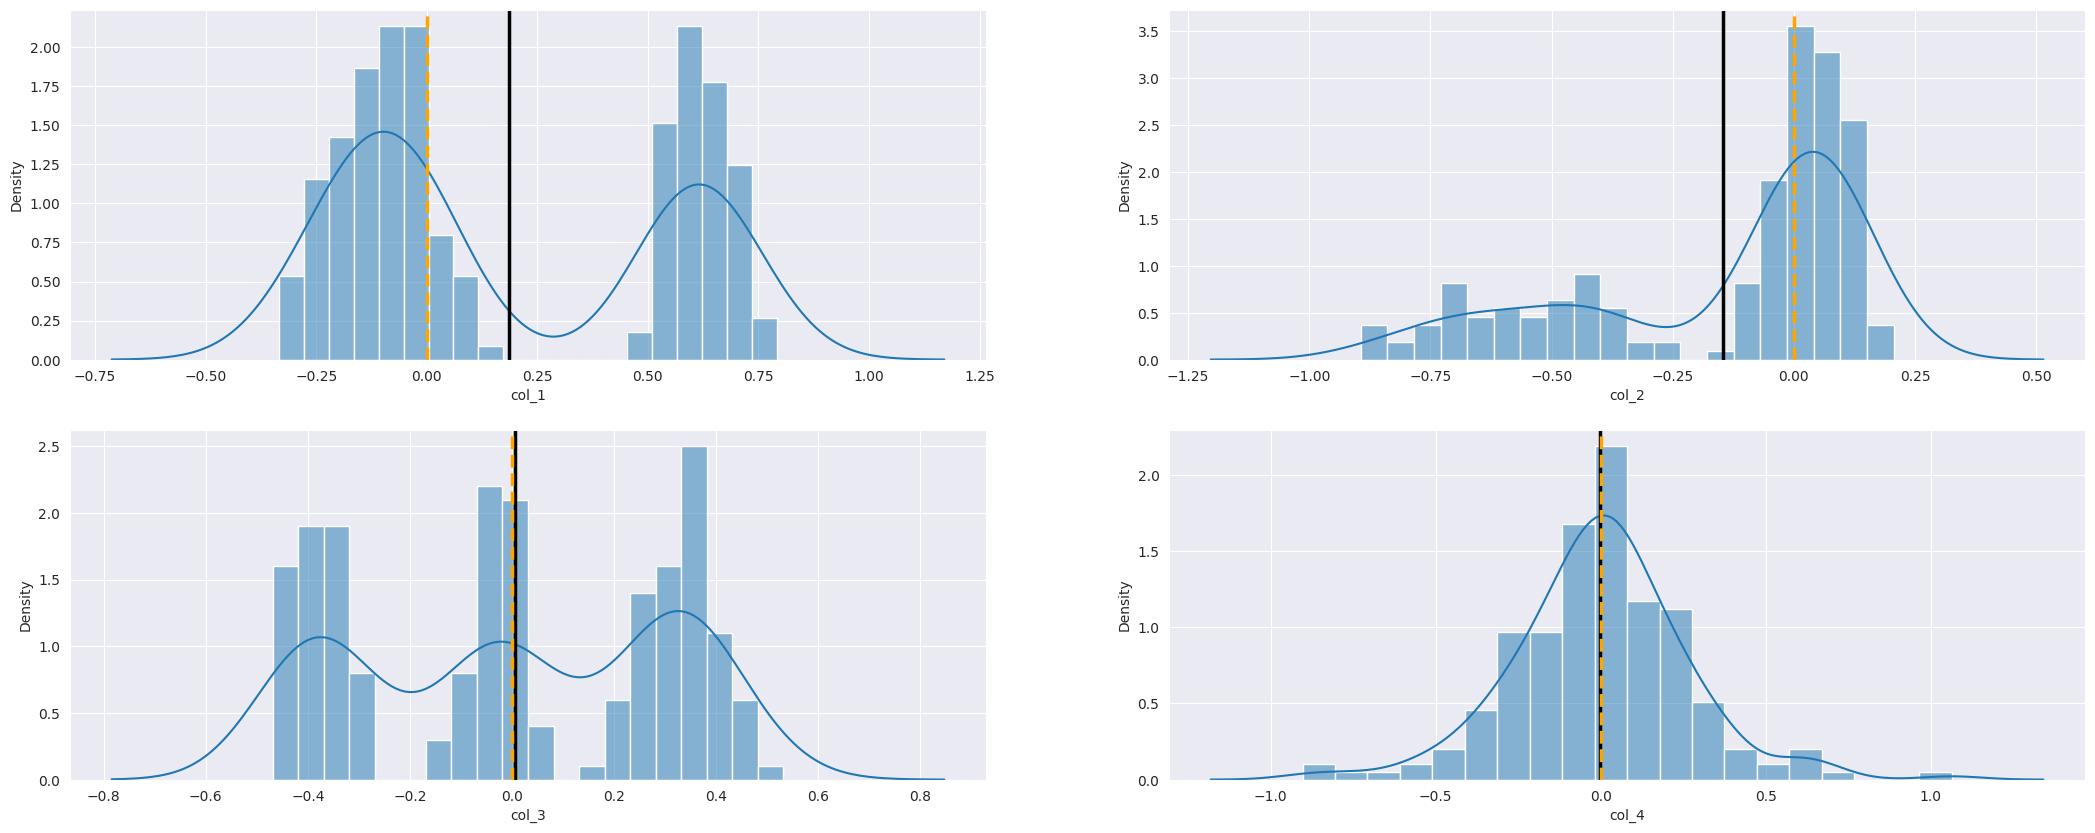

In [17]:
plot_distributions(y_df, plot_cols=2)

### Попробуем упростить визуализацию данных снизив размерность с 4 до 3

In [18]:
from sklearn.decomposition import PCA

In [19]:
columns_3d = ['col_a', 'col_b', 'col_c']

In [20]:
x_pca = PCA(n_components=3, random_state=42)
x_df_3d = pd.DataFrame(x_pca.fit_transform(x_df), columns=columns_3d)
y_pca = PCA(n_components=3, random_state=42)
y_df_3d = pd.DataFrame(y_pca.fit_transform(y_df), columns=columns_3d)
display(sum(x_pca.explained_variance_ratio_))
display(sum(y_pca.explained_variance_ratio_))

1.0

0.9848924053361766

/tmp/ipykernel_8571/1292065292.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(df[x_col], df[y_col], df[z_col], c=colors, cmap='plasma')


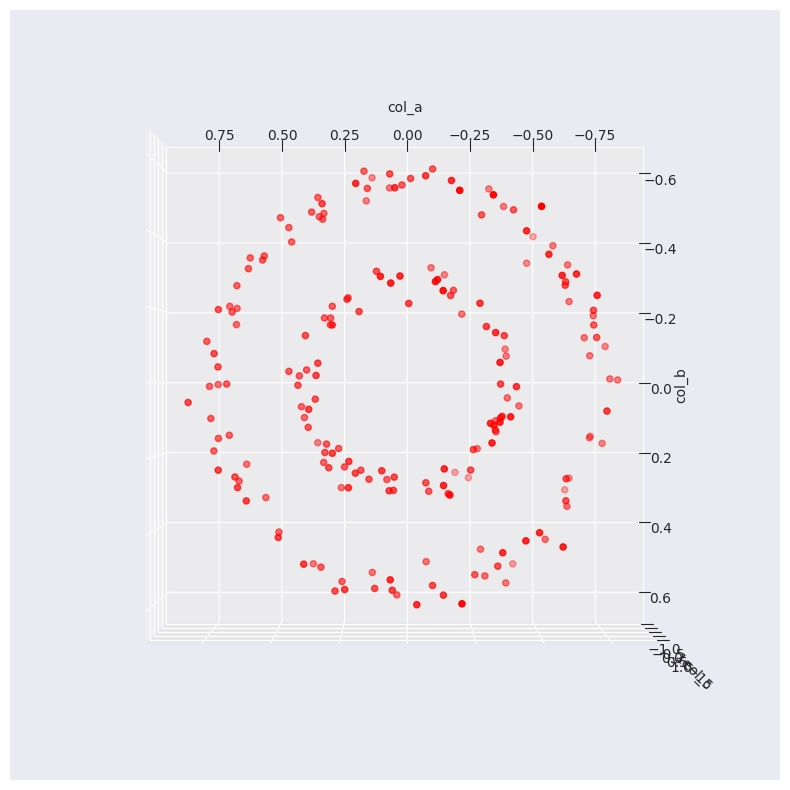

In [21]:
plot_3D(x_df_3d, 1, plot_cols = 1, angle=(90,90))

/tmp/ipykernel_8571/1292065292.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(df[x_col], df[y_col], df[z_col], c=colors, cmap='plasma')


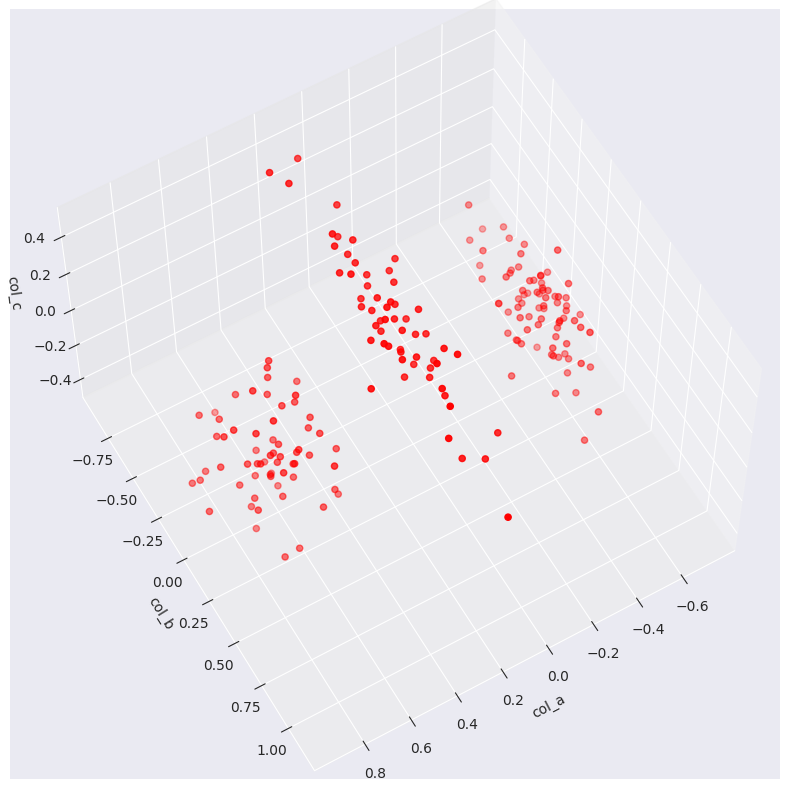

In [22]:
plot_3D(y_df_3d, 1, plot_cols = 1, angle=(60,60))

Ошибка снижения размерности с 4 до 3 минимальна для обоих датасетов, это значит что мы можем правильно идентифицировать кластеры визуально

### Подготовка данных

Для обоих датасетов будем использовать наиболее популярную меру расстояния - евклидово расстояние

In [23]:
from sklearn.metrics.pairwise import euclidean_distances

x_df_dist = euclidean_distances(x_df)
y_df_dist = euclidean_distances(y_df)

In [24]:
x_df_dist

array([[0.        , 0.28921273, 0.1473391 , ..., 0.31645609, 0.06604197,
        0.33784003],
       [0.28921273, 0.        , 0.20706935, ..., 0.03260919, 0.27675527,
        0.09091901],
       [0.1473391 , 0.20706935, 0.        , ..., 0.2395175 , 0.18558191,
        0.28563027],
       ...,
       [0.31645609, 0.03260919, 0.2395175 , ..., 0.        , 0.29946438,
        0.06473547],
       [0.06604197, 0.27675527, 0.18558191, ..., 0.29946438, 0.        ,
        0.30851649],
       [0.33784003, 0.09091901, 0.28563027, ..., 0.06473547, 0.30851649,
        0.        ]])

In [25]:
display(pd.DataFrame(x_df_dist).describe())
display(pd.DataFrame(y_df_dist).describe())

0           1           2           3           4           5    \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.762886    0.589202    0.704585    0.736884    0.562159    0.754435   
std      0.319726    0.260796    0.316333    0.320946    0.238775    0.328341   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.505494    0.378433    0.423518    0.456531    0.391037    0.460767   
50%      0.833176    0.608974    0.756093    0.784783    0.569904    0.804872   
75%      1.024573    0.808816    0.951254    0.995355    0.760104    1.001397   
max      1.248254    1.020760    1.204082    1.234053    0.987060    1.265231   

              6           7           8           9    ...         190  \
count  200.000000  200.000000  200.000000  200.000000  ...  200.000000   
mean     0.748890    0.591182    0.727406    0.800417  ...    0.575602   
std      0.332576    0.261682    0.329692    0.342114  ...    0.246092   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.471008    0.376377    0.453850    0.519998  ...    0.396098   
50%      0.786633    0.612186    0.754529    0.838805  ...    0.577428   
75%      0.999998    0.813692    0.977924    1.056023  ...    0.812013   
max      1.275631    1.020617    1.263607    1.337813  ...    0.943927   

              191         192         193         194         195         196  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.704211    0.743001    0.750292    0.683161    0.722985    0.578849   
std      0.300546    0.309046    0.310036    0.294055    0.306340    0.247281   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.447058    0.485320    0.515580    0.454825    0.487397    0.381505   
50%      0.734765    0.788247    0.797998    0.734784    0.771125    0.580778   
75%      0.999915    1.047120    1.034565    0.959554    0.998851    0.820992   
max      1.139960    1.185231    1.198254    1.106989    1.167223    0.947098   

              197         198         199  
count  200.000000  200.000000  200.000000  
mean     0.576391    0.743585    0.568664  
std      0.250464    0.312414    0.238976  
min      0.000000    0.000000    0.000000  
25%      0.373143    0.498252    0.370133  
50%      0.584331    0.801941    0.558051  
75%      0.787433    1.007322    0.805783  
max      0.993366    1.204857    0.929930  

[8 rows x 200 columns]

0           1           2           3           4           5    \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.848847    0.647335    0.691541    0.747685    0.751969    0.825216   
std      0.387730    0.236782    0.285202    0.436389    0.423192    0.280770   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.420797    0.556105    0.487957    0.275974    0.296700    0.653845   
50%      0.906100    0.693074    0.790470    0.808442    0.804367    0.907687   
75%      1.198840    0.793608    0.919342    1.161385    1.148814    1.019455   
max      1.446594    1.111056    1.183175    1.509227    1.493602    1.475959   

              6           7           8           9    ...         190  \
count  200.000000  200.000000  200.000000  200.000000  ...  200.000000   
mean     0.793727    0.731485    0.799877    0.676220  ...    0.649197   
std      0.429114    0.396957    0.331965    0.364501  ...    0.256591   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.348501    0.337042    0.528105    0.278251  ...    0.544817   
50%      0.876669    0.761617    0.736429    0.726816  ...    0.726968   
75%      1.173370    1.088369    1.124993    1.005867  ...    0.823007   
max      1.529791    1.471089    1.419907    1.334346  ...    1.143121   

              191         192         193         194         195         196  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.700675    0.707156    0.920700    0.910399    0.753100    0.910472   
std      0.381668    0.277039    0.286475    0.441964    0.403152    0.266786   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.313843    0.560544    0.795947    0.434547    0.340877    0.766874   
50%      0.764731    0.805059    0.982333    0.942351    0.803785    0.934445   
75%      1.054519    0.908567    1.116225    1.328832    1.116541    1.075597   
max      1.448415    1.161174    1.506270    1.534372    1.462420    1.565031   

              197         198         199  
count  200.000000  200.000000  200.000000  
mean     0.792702    0.854316    0.759943  
std      0.463205    0.383590    0.262887  
min      0.000000    0.000000    0.000000  
25%      0.296037    0.419240    0.665259  
50%      0.915464    0.937367    0.811506  
75%      1.214734    1.199600    0.933423  
max      1.570527    1.375076    1.309447  

[8 rows x 200 columns]

Перейдем к матрице близости с помощью формулы ядра Гауссиана
$$
  $similarity = \frac{1}{ e^\frac{{d}^2}{2{σ^2}} }
$$

Также для каждой вершины оставим только k ее ближайших соседей, а similarity остальных соседей сделаем очень маленькой, но не нулевой, чтобы не нарушать связность графа.

Ту же маску применим и для матрицы расстояний

Параметр k был подобран вручную

In [26]:
from sklearn.neighbors import kneighbors_graph

In [27]:
x_df_knn_k = 10
x_df_sigma = x_df_dist.std()
x_df_sim = math.e ** (- (x_df_dist ** 2 / (2 * x_df_sigma ** 2)))
x_df_sim_mask = np.asarray(kneighbors_graph(x_df_sim, x_df_knn_k, mode='connectivity').todense())
x_df_sim[np.maximum(x_df_sim_mask, x_df_sim_mask.T) == 0] = 0.001
x_df_dist[np.maximum(x_df_sim_mask, x_df_sim_mask.T) == 0] = x_df_dist.max()
np.fill_diagonal(x_df_dist, 0)

y_df_knn_k = 40
y_df_sigma = y_df_dist.std()
y_df_sim = math.e ** (- (y_df_dist ** 2 / (2 * y_df_sigma ** 2)))
y_df_sim_mask = np.asarray(kneighbors_graph(y_df_sim, y_df_knn_k, mode='connectivity').todense())
y_df_sim[np.maximum(y_df_sim_mask, y_df_sim_mask.T) == 0] = 0.001
y_df_dist[np.maximum(y_df_sim_mask, y_df_sim_mask.T) == 0] = y_df_dist.max()
np.fill_diagonal(y_df_dist, 0)

x_df_sim

array([[0.001     , 0.001     , 0.90882962, ..., 0.001     , 0.98097664,
        0.001     ],
       [0.001     , 0.001     , 0.001     , ..., 0.9953283 , 0.001     ,
        0.96425297],
       [0.90882962, 0.001     , 0.001     , ..., 0.001     , 0.85927699,
        0.001     ],
       ...,
       [0.001     , 0.9953283 , 0.001     , ..., 0.001     , 0.001     ,
        0.98171501],
       [0.98097664, 0.001     , 0.85927699, ..., 0.001     , 0.001     ,
        0.001     ],
       [0.001     , 0.96425297, 0.001     , ..., 0.98171501, 0.001     ,
        0.001     ]])

Построим графовую модель, которую будем использовать для спектральной клстеризации

In [28]:
import networkx as nx

In [29]:
x_df_graph = nx.from_numpy_matrix(x_df_sim)
x_df_graph.remove_edges_from(nx.selfloop_edges(x_df_graph))
y_df_graph = nx.from_numpy_matrix(y_df_sim)
y_df_graph.remove_edges_from(nx.selfloop_edges(y_df_graph))

Построим первые 5 вершин графа x

In [30]:
graph_for_plot = nx.subgraph(x_df_graph, list(x_df_graph.nodes)[:5])

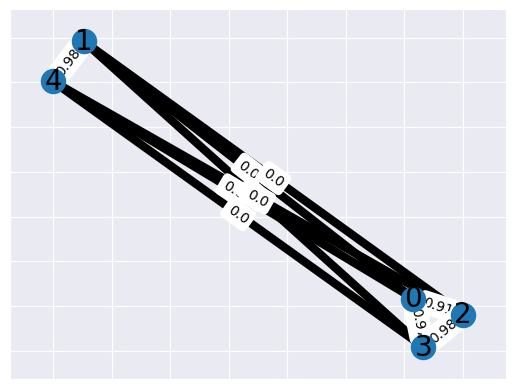

In [31]:
pos = nx.spring_layout(graph_for_plot, seed = 7)
nx.draw_networkx_nodes(graph_for_plot, pos, node_size=300)
nx.draw_networkx_labels(graph_for_plot, pos, font_size=20, font_family="sans-serif")

nx.draw_networkx_edges(graph_for_plot, pos, edgelist=graph_for_plot.edges, width=6)
labels = nx.get_edge_attributes(graph_for_plot, 'weight')
labels = {k: round(v, 2) for k, v in labels.items()}

nx.draw_networkx_edge_labels(graph_for_plot, pos, labels)
plt.show()

## 1. Кластеризация для числа кластеров k=2.

K-means

In [32]:
from sklearn.cluster import KMeans

In [33]:
x_df_kmeans_2 = KMeans(n_clusters=2, random_state=42).fit_predict(x_df)
y_df_kmeans_2 = KMeans(n_clusters=2, random_state=42).fit_predict(y_df)

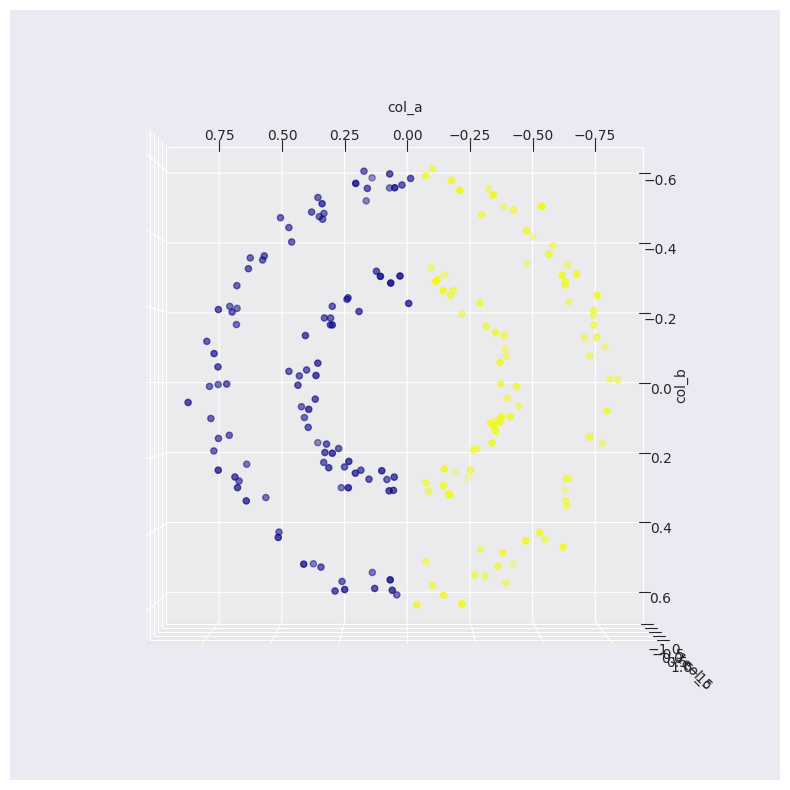

In [34]:
plot_3D(x_df_3d, 1, plot_cols=1, colors=x_df_kmeans_2, angle=(90,90))

Видим, что kmeans для датасета X не смог правильно определить кластеры, так как для успешной работы k-means данные должны быть примерно сферичискими

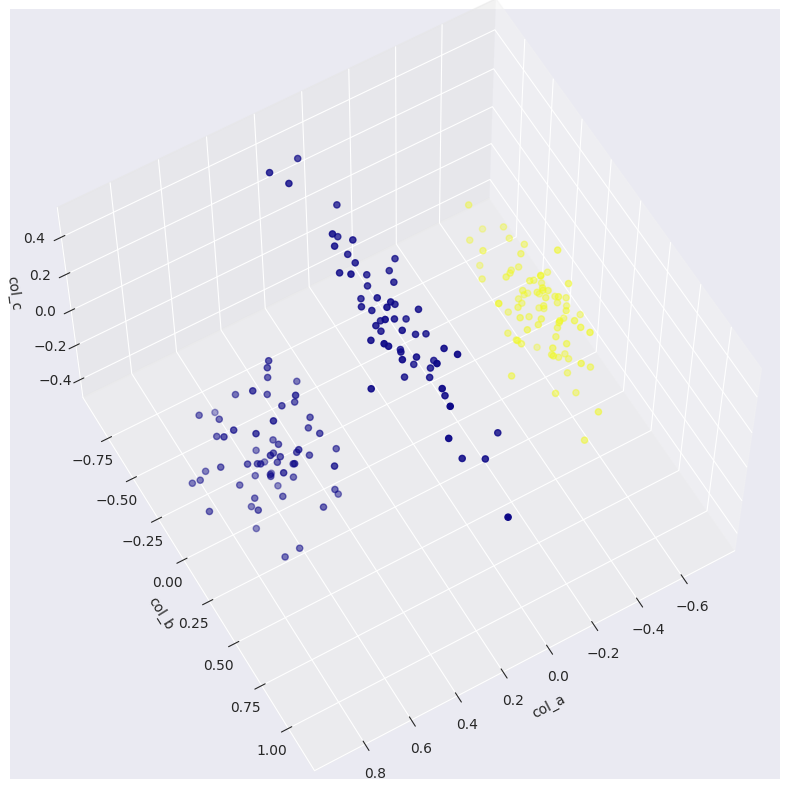

In [35]:
plot_3D(y_df_3d, 1, plot_cols=1, colors=y_df_kmeans_2, angle=(60,60))

Для датасета Y разделение с помощью K-means дало правильный (для 2 кластеров) результат

## EM алгоритм

In [36]:
from sklearn.mixture import GaussianMixture

In [37]:
x_df_em_2 = GaussianMixture(n_components=2, covariance_type='full').fit_predict(x_df)
y_df_em_2 = GaussianMixture(n_components=2, covariance_type='full').fit_predict(y_df)

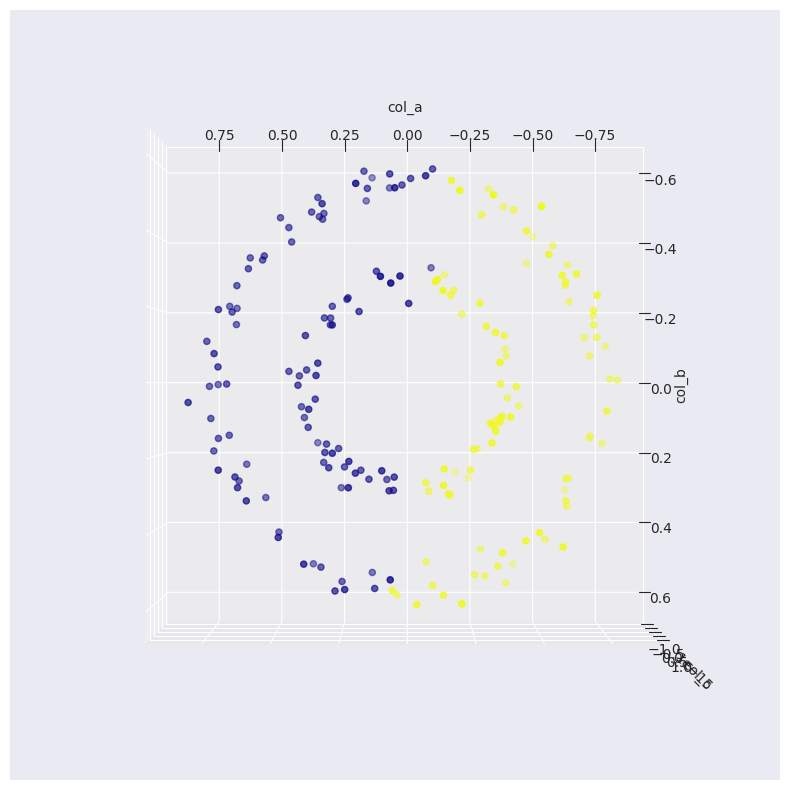

In [38]:
plot_3D(x_df_3d, 1, plot_cols=1, colors=x_df_em_2, angle=(90,90))

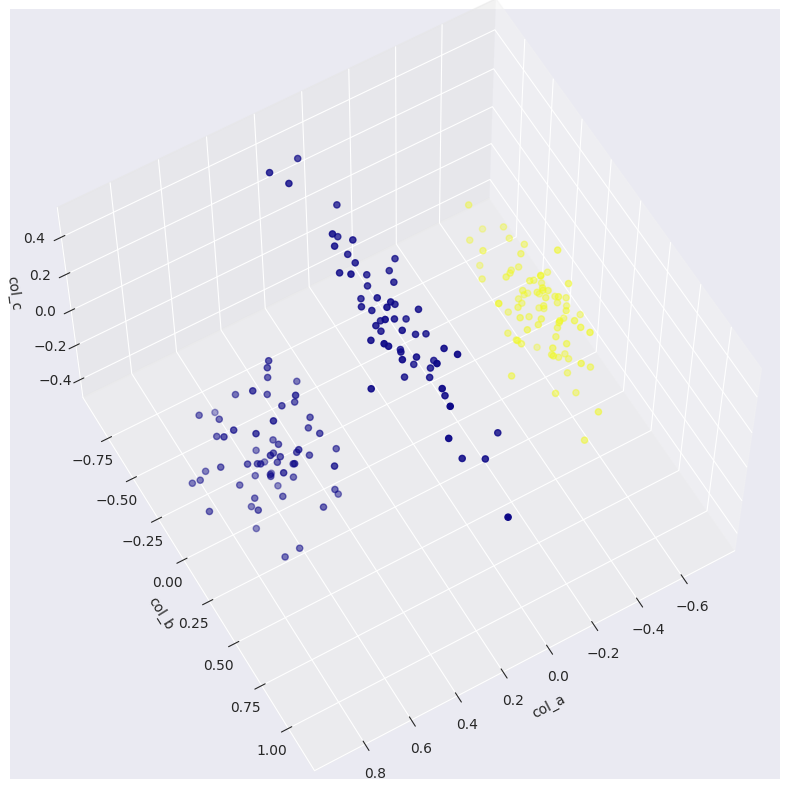

In [39]:
plot_3D(y_df_3d, 1, plot_cols=1, colors=y_df_em_2, angle=(60,60))

Видим тот же самый результат, что дал нам алгоритм K-Means

## Single linkage

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
x_df_sl_2 = AgglomerativeClustering(linkage='single', n_clusters=2, affinity='precomputed', connectivity=x_df_sim_mask).fit_predict(x_df_dist)
y_df_sl_2 = AgglomerativeClustering(linkage='single', n_clusters=2, affinity='precomputed', connectivity=y_df_sim_mask).fit_predict(y_df_dist)

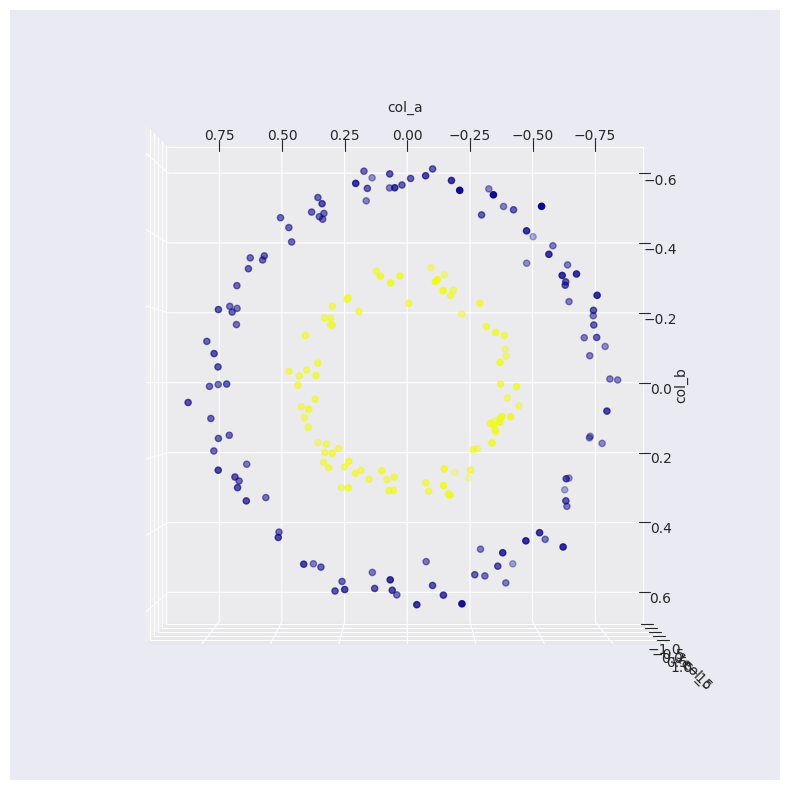

In [42]:
plot_3D(x_df_3d, 1, plot_cols=1, colors=x_df_sl_2, angle=(90,90))

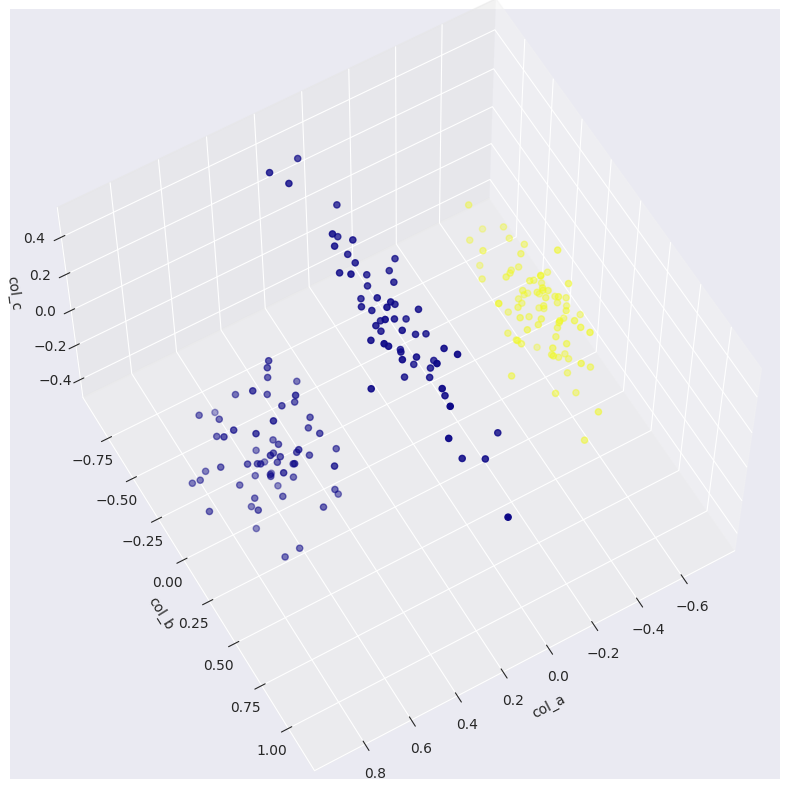

In [43]:
plot_3D(y_df_3d, 1, plot_cols=1, colors=y_df_sl_2, angle=(60,60))

Single linkage алгоритм смог правильно определить кластеры как для первого, так и для второго датасета

## Spectral algorithm

In [44]:
from sklearn.cluster import SpectralClustering

In [45]:
x_df_spectral_2 = SpectralClustering(n_clusters=2, affinity='precomputed').fit_predict(np.asarray(nx.to_numpy_matrix(x_df_graph)))
y_df_spectral_2 = SpectralClustering(n_clusters=2, affinity='precomputed').fit_predict(np.asarray(nx.to_numpy_matrix(y_df_graph)))

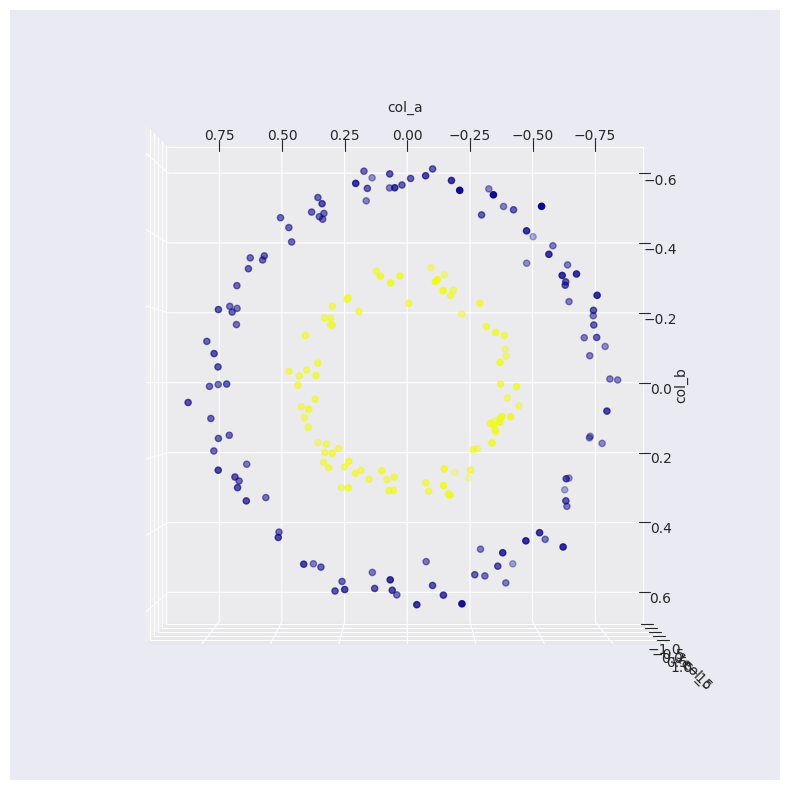

In [46]:
plot_3D(x_df_3d, 1, plot_cols=1, colors=x_df_spectral_2, angle=(90,90))

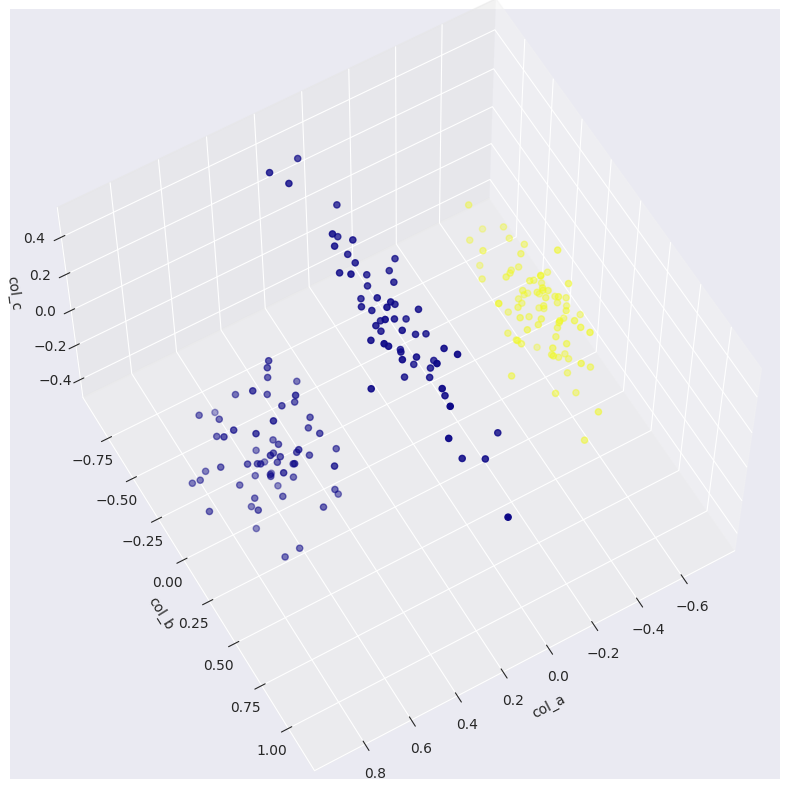

In [47]:
plot_3D(y_df_3d, 1, plot_cols=1, colors=y_df_spectral_2, angle=(60,60))

Видим, что спектральная кластеризация также дала хороший результат для обоих датасетов. Стоит отметить, что если не использовать knn при переходе к матрице близости, то для датасета X кластеры были бы разбиты как алгоритмом K-means

## 1.2 Сравнить попарно разбиения, полученные разными методами с помощью RAND индекса
(вычислить RAND индекс для каждой пары разбиений). Дать комментарий к результату.

In [48]:
from sklearn.metrics import rand_score

In [49]:
x_df_cluster_algo_2 = {
    'k-means': x_df_kmeans_2,
    'em': x_df_em_2,
    'single_linkage': x_df_sl_2,
    'spectral': x_df_spectral_2,
}
for algo_1, algo_2 in combinations(x_df_cluster_algo_2.keys(), 2):
    print(f'RAND индекс для пары {algo_1} и {algo_2} = {rand_score(x_df_cluster_algo_2[algo_1], x_df_cluster_algo_2[algo_2])}')

RAND индекс для пары k-means и em = 0.9510050251256281
RAND индекс для пары k-means и single_linkage = 0.49748743718592964
RAND индекс для пары k-means и spectral = 0.49748743718592964
RAND индекс для пары em и single_linkage = 0.4975376884422111
RAND индекс для пары em и spectral = 0.4975376884422111
RAND индекс для пары single_linkage и spectral = 1.0


Видим, что для датасета X k-means дает такое же разбиение на кластеры как и em алгоритм, в то время как single linkage дает такое же разбиение как и spectral алгоритм

In [50]:
y_df_cluster_algo_2 = {
    'k-means': y_df_kmeans_2,
    'em': y_df_em_2,
    'single_linkage': y_df_sl_2,
    'spectral': y_df_spectral_2,
}
for algo_1, algo_2 in combinations(y_df_cluster_algo_2.keys(), 2):
    print(f'RAND индекс для пары {algo_1} и {algo_2} = {rand_score(y_df_cluster_algo_2[algo_1], y_df_cluster_algo_2[algo_2])}')

RAND индекс для пары k-means и em = 1.0
RAND индекс для пары k-means и single_linkage = 1.0
RAND индекс для пары k-means и spectral = 1.0
RAND индекс для пары em и single_linkage = 1.0
RAND индекс для пары em и spectral = 1.0
RAND индекс для пары single_linkage и spectral = 1.0


Видим, что для датасета X все алгоритмы дали одинаковое разбиение на кластеры

## 1.3 Вычислить значение функции модулярности для каждого разбиения на 2 кластера из п.1.1.

In [51]:
import networkx.algorithms.community as nx_comm
from networkx.algorithms.community import greedy_modularity_communities

In [52]:
def group_clusters(df):
    return pd.Series(range(len(df))).groupby(df, sort=False).apply(list).tolist()

In [53]:
for key, value in x_df_cluster_algo_2.items():
    print(f'Модулярность для {key} = {nx_comm.modularity(x_df_graph, group_clusters(value))}')

x_df_greedy_modularity_2 = greedy_modularity_communities(x_df_graph, weight='weight', best_n=2)
print(f'Максимальная модулярность найденная алгоритмом Clauset-Newman-Moore для 2 кластеров = {nx_comm.modularity(x_df_graph, x_df_greedy_modularity_2)}')

Модулярность для k-means = 0.44490156805873504
Модулярность для em = 0.4435238765814873
Модулярность для single_linkage = 0.46726865982064864
Модулярность для spectral = 0.46726865982064864
Максимальная модулярность найденная алгоритмом Clauset-Newman-Moore для 2 кластеров = 0.46726865982064864


Видим, что алгоритмы single linkage и spectral имеют наилучшую модулярность, а значит наилучшее разбиение по этой метрике

In [54]:
for key, value in y_df_cluster_algo_2.items():
    print(f'Модулярность для {key} = {nx_comm.modularity(y_df_graph, group_clusters(value))}')

y_df_greedy_modularity_2 = greedy_modularity_communities(y_df_graph, weight='weight', best_n=2)
print(f'Максимальная модулярность найденная алгоритмом Clauset-Newman-Moore для 2 кластеров = {nx_comm.modularity(y_df_graph, y_df_greedy_modularity_2)}')

Модулярность для k-means = 0.4928281060063272
Модулярность для em = 0.4928281060063272
Модулярность для single_linkage = 0.4928281060063272
Модулярность для spectral = 0.4928281060063272
Максимальная модулярность найденная алгоритмом Clauset-Newman-Moore для 2 кластеров = 0.4928281060063272


Видим, что все алгоритмы имеют одинаковую модулярность, что очевидно, так как они дали одинаковые разбиения

Также вычислим максимальную модулярность и количество кластеров, при которой она достигается

In [55]:
x_df_greedy_modularity_max = greedy_modularity_communities(x_df_graph, weight='weight')
y_df_greedy_modularity_max = greedy_modularity_communities(y_df_graph, weight='weight')
print(f'Наилучшее по модулярности число кластеров для X = {len(x_df_greedy_modularity_max)}, а модулярность = {nx_comm.modularity(x_df_graph, x_df_greedy_modularity_max)}')
print(f'Наилучшее по модулярности число кластеров для Y = {len(y_df_greedy_modularity_max)}, а модулярность = {nx_comm.modularity(y_df_graph, y_df_greedy_modularity_max)}')

Наилучшее по модулярности число кластеров для X = 5, а модулярность = 0.714434242798306
Наилучшее по модулярности число кластеров для Y = 3, а модулярность = 0.6367062870022738


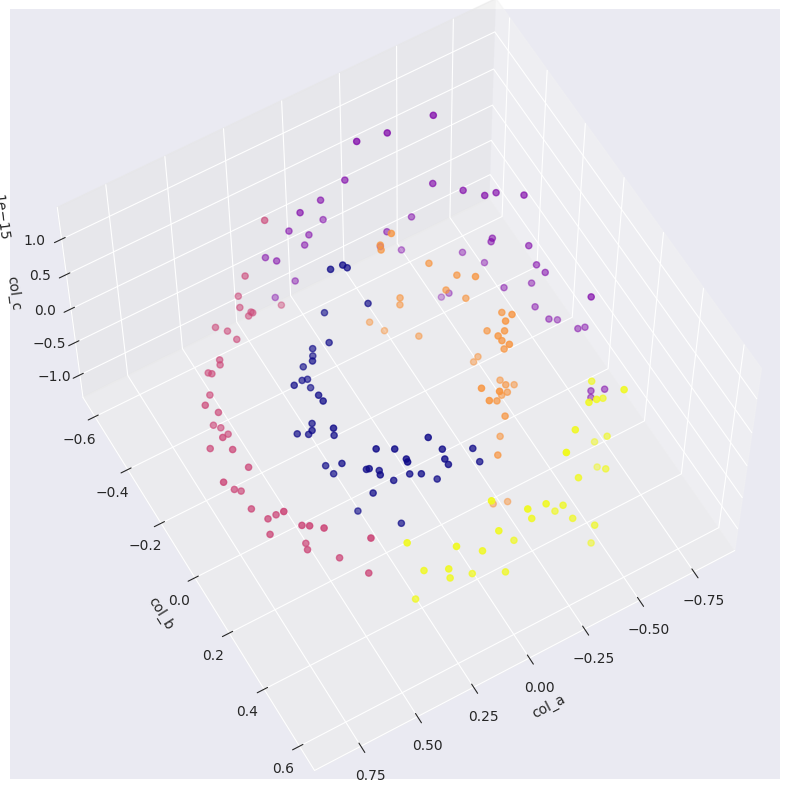

In [56]:
x_df_max_modularity = np.zeros(len(x_df))
for i, group in enumerate(x_df_greedy_modularity_max):
    for el in group:
        x_df_max_modularity[el] = i

x_df_max_modularity = pd.DataFrame.from_dict(x_df_max_modularity)
plot_3D(x_df_3d, 1, plot_cols=1, colors=x_df_max_modularity, angle=(60,60))

Алгоритм вывел интересный паттер, который имеет право на жизнь, однако кажется что кластеров должно быть все-таки 2

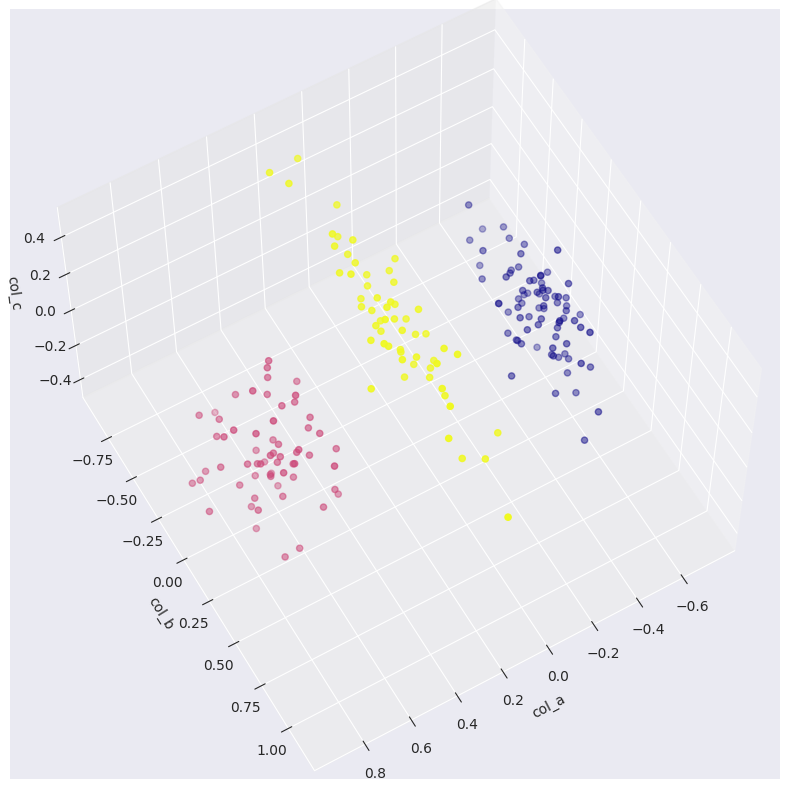

In [57]:
y_df_max_modularity = np.zeros(len(y_df))
for i, group in enumerate(y_df_greedy_modularity_max):
    for el in group:
        y_df_max_modularity[el] = i

y_df_max_modularity = pd.DataFrame.from_dict(y_df_max_modularity)
plot_3D(y_df_3d, 1, plot_cols=1, colors=y_df_max_modularity, angle=(60,60))

Тут без сюрпризов, правильное количество кластеров = 3

## 1.4 Сделать общие выводы по возможности разбиения на 2 кластера каждого набора данных.

Было выявлено, что для данных X наилучшее число кластеров как раз равняется 2, в то время как для данных Y наилучшее число кластеров = 3.

Однако стоит отметить, что модулярность 3 кластерного разбиения для Y не сильно больше чем для 2 кластерного разбиения. Т.е 2 кластерное разбиение также имеет право на жизнь

## 2. Кластеризация для числа кластеров k=3.

## K-means

In [58]:
x_df_kmeans_3 = KMeans(n_clusters=3, random_state=42).fit_predict(x_df)
y_df_kmeans_3 = KMeans(n_clusters=3, random_state=42).fit_predict(y_df)

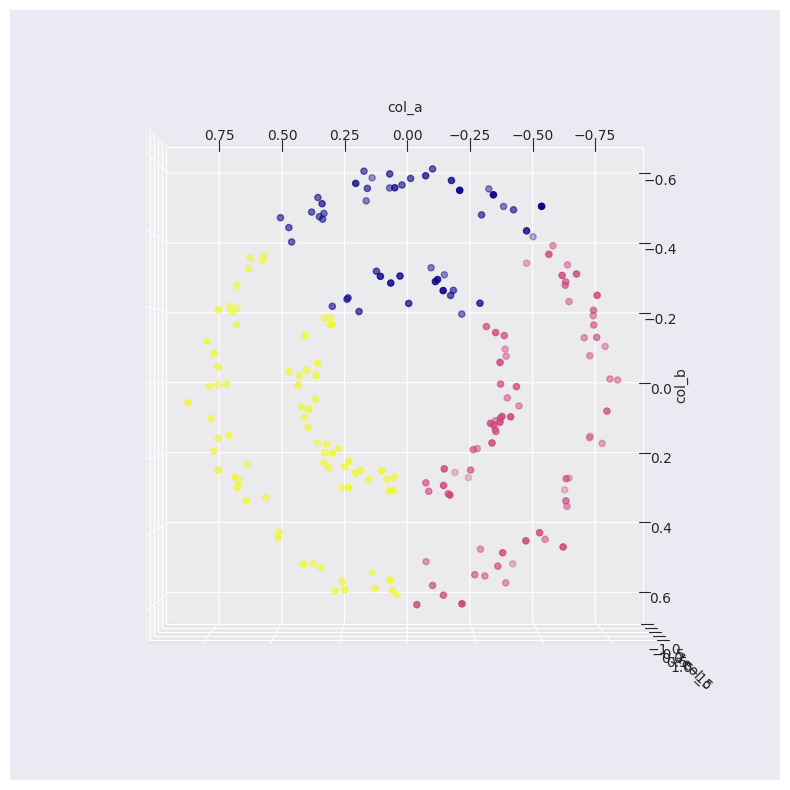

In [59]:
plot_3D(x_df_3d, 1, plot_cols=1, colors=x_df_kmeans_3, angle=(90, 90))

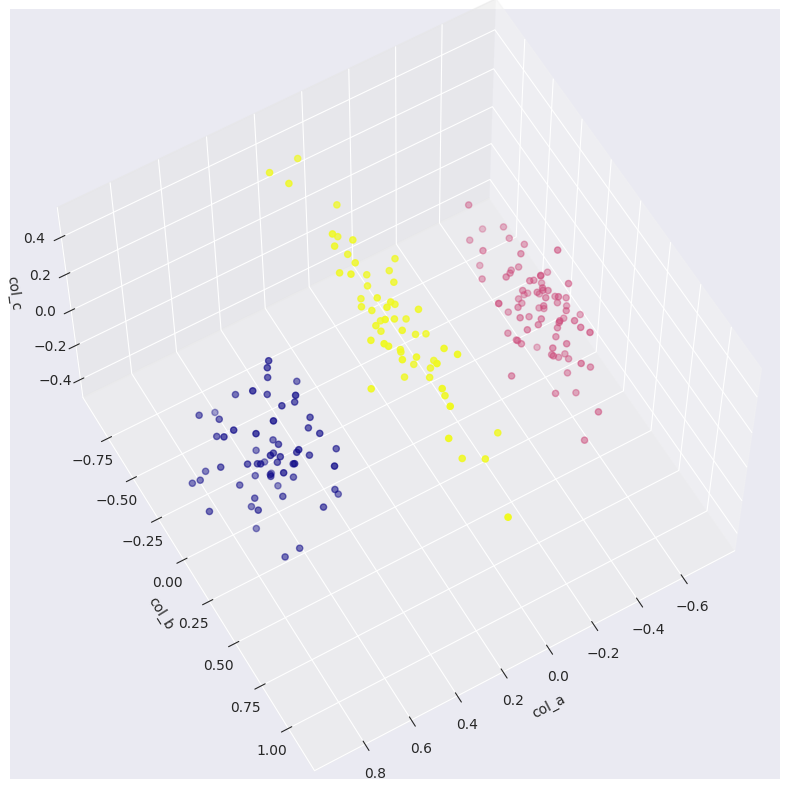

In [60]:
plot_3D(y_df_3d, 1, plot_cols=1, colors=y_df_kmeans_3, angle=(60, 60))

Видим, что для Y алгоритм выделил 3 правильных кластера. Для X результат ожидаем

## EM

In [61]:
x_df_em_3 = GaussianMixture(n_components=3, covariance_type='full').fit_predict(x_df)
y_df_em_3 = GaussianMixture(n_components=3, covariance_type='full').fit_predict(y_df)

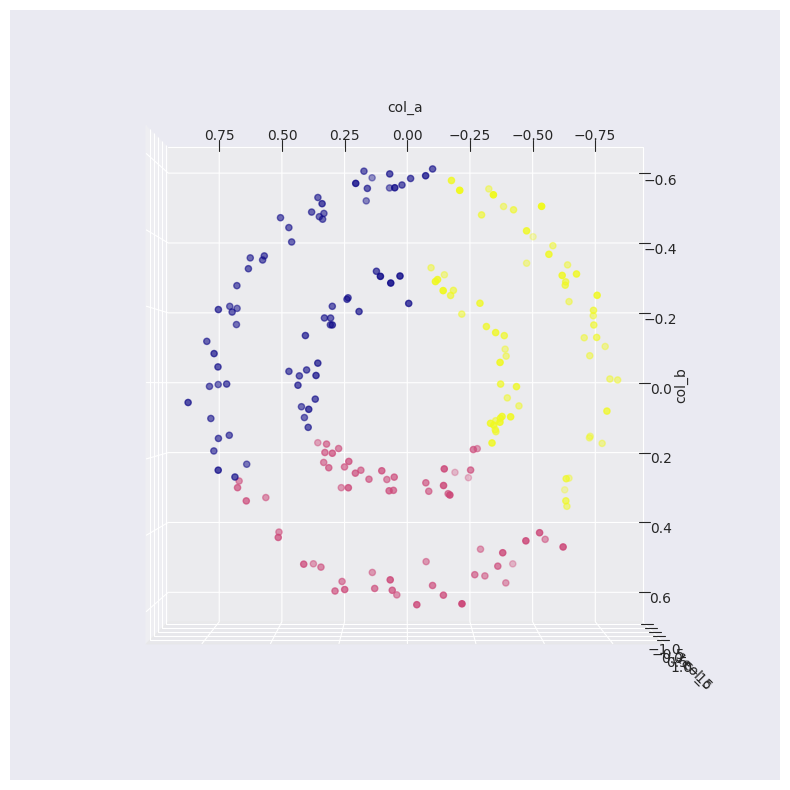

In [62]:
plot_3D(x_df_3d, 1, plot_cols=1, colors=x_df_em_3, angle=(90, 90))

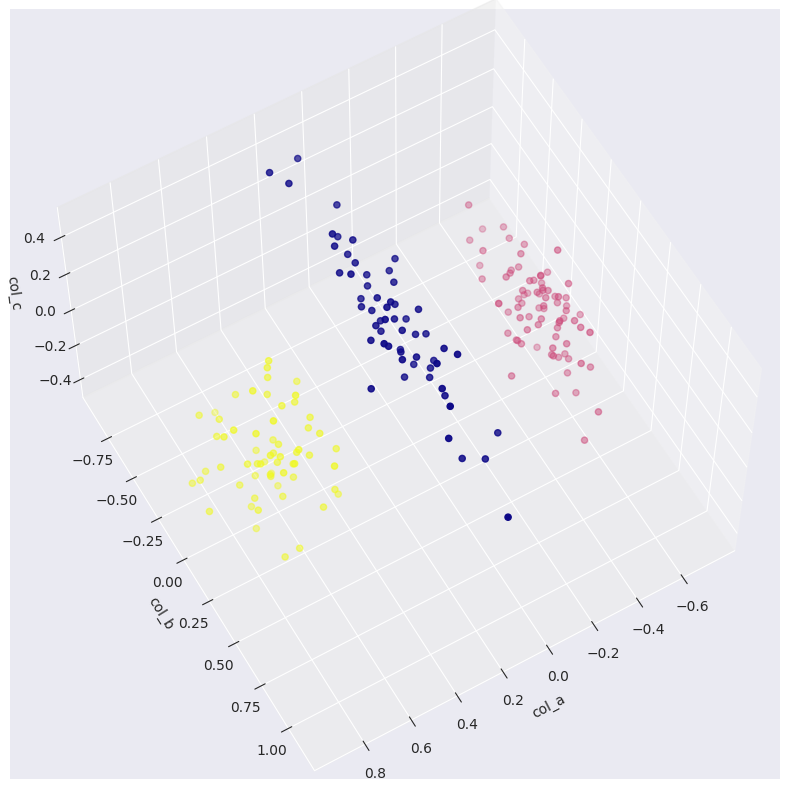

In [63]:
plot_3D(y_df_3d, 1, plot_cols=1, colors=y_df_em_3, angle=(60, 60))

Em алгоритм дал идентичные результаты алгоритму kmeans

## Single linkage

In [64]:
x_df_sl_3 = AgglomerativeClustering(linkage='single', n_clusters=3, affinity='precomputed', connectivity=x_df_sim_mask).fit_predict(x_df_dist)
y_df_sl_3 = AgglomerativeClustering(linkage='single', n_clusters=3, affinity='precomputed', connectivity=y_df_sim_mask).fit_predict(y_df_dist)

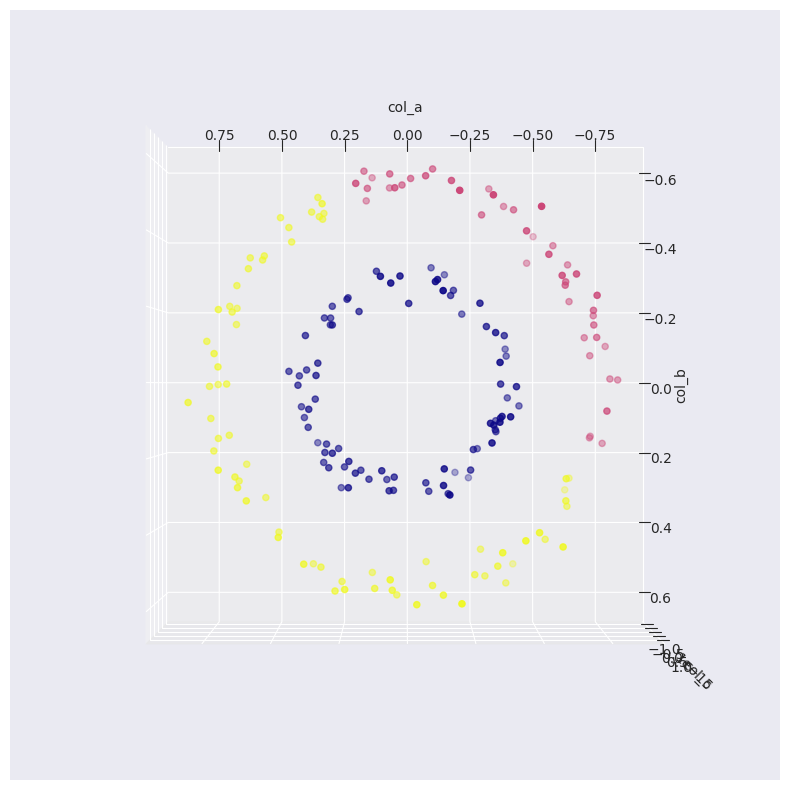

In [65]:
plot_3D(x_df_3d, 1, plot_cols=1, colors=x_df_sl_3, angle=(90, 90))

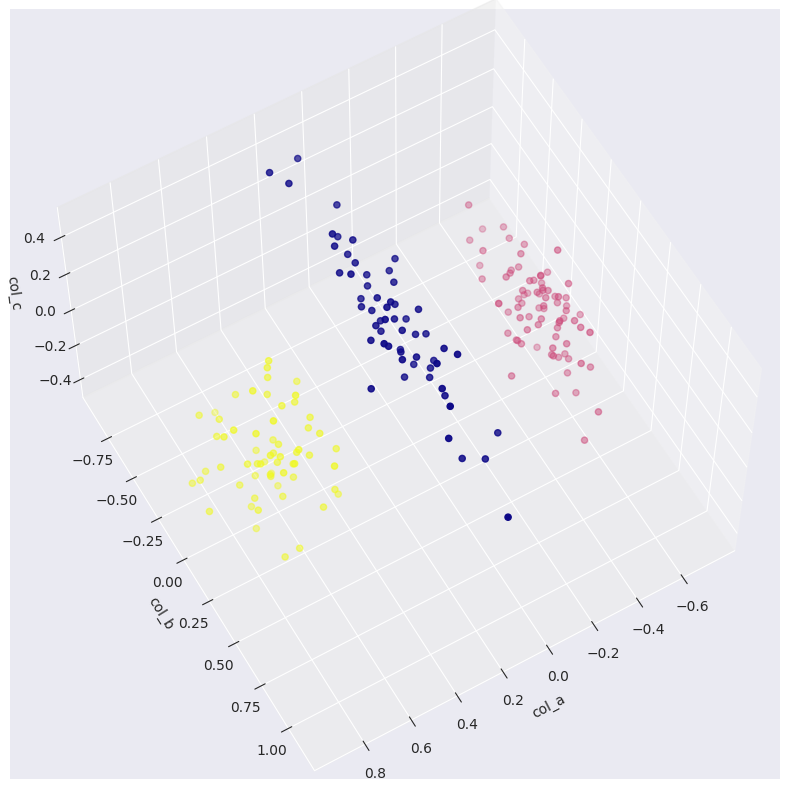

In [66]:
plot_3D(y_df_3d, 1, plot_cols=1, colors=y_df_sl_3, angle=(60, 60))

Single linkage алгоритм выделил правильные кластеры для датасета Y, для X кластера получились отличные от предыдущих методов

## Spectral algorithm

In [67]:
x_df_spectral_3 = SpectralClustering(n_clusters=3, affinity='precomputed').fit_predict(
    np.asarray(nx.to_numpy_matrix(x_df_graph)))
y_df_spectral_3 = SpectralClustering(n_clusters=3, affinity='precomputed').fit_predict(
    np.asarray(nx.to_numpy_matrix(y_df_graph)))

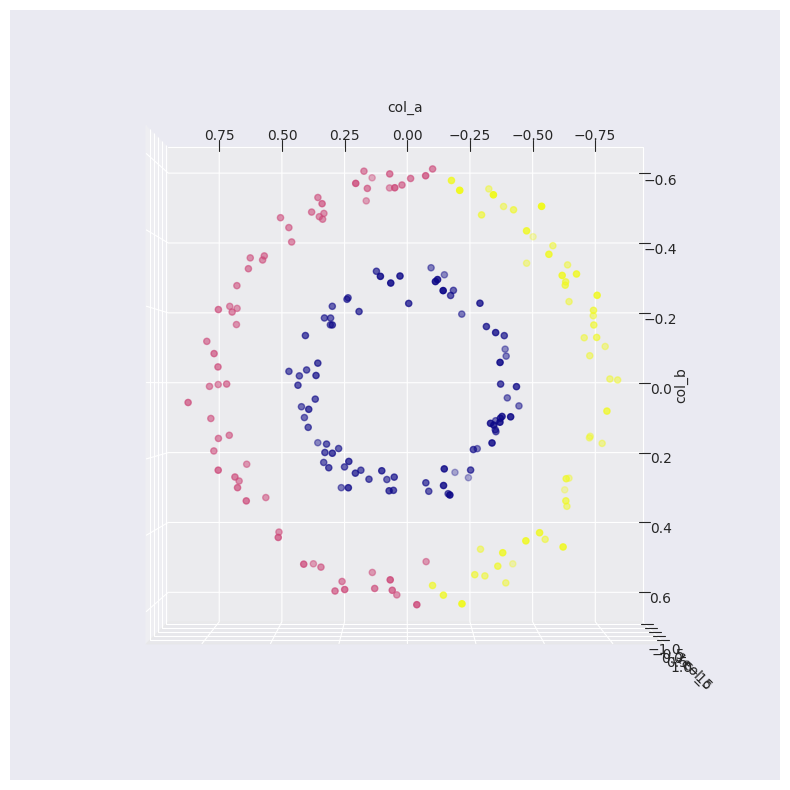

In [68]:
plot_3D(x_df_3d, 1, plot_cols=1, colors=x_df_spectral_3, angle=(90, 90))

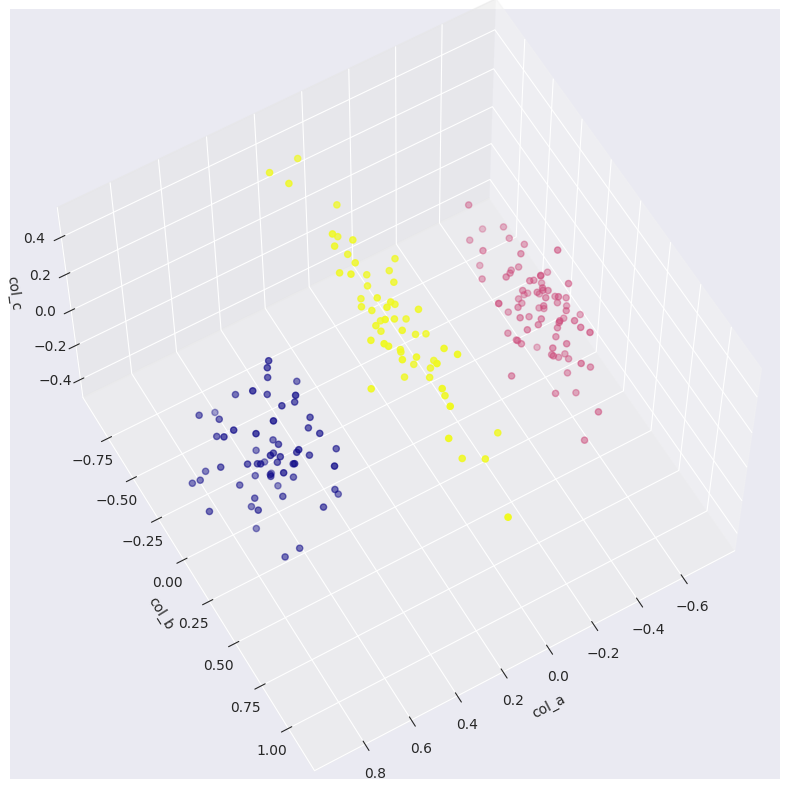

In [69]:
plot_3D(y_df_3d, 1, plot_cols=1, colors=y_df_spectral_3, angle=(60, 60))

Для датасета X разбиение похоже на то, что было получено алгоритмом Clauset-Newman-Moore из модуля networkx, но для 3 кластеров.

Y разбит правильно на 3 кластера

## 2.2 Сравнить попарно разбиения, полученные разными методами с помощью RAND индекса
(вычислить RAND индекс для каждой пары разбиений). Дать комментарий к результату.

In [70]:
x_df_cluster_algo_3 = {
    'k-means': x_df_kmeans_3,
    'em': x_df_em_3,
    'single_linkage': x_df_sl_3,
    'spectral': x_df_spectral_3,
}
for algo_1, algo_2 in combinations(x_df_cluster_algo_3.keys(), 2):
    print(
        f'RAND индекс для пары {algo_1} и {algo_2} = {rand_score(x_df_cluster_algo_3[algo_1], x_df_cluster_algo_3[algo_2])}')


RAND индекс для пары k-means и em = 0.678894472361809
RAND индекс для пары k-means и single_linkage = 0.5861306532663316
RAND индекс для пары k-means и spectral = 0.6317085427135678
RAND индекс для пары em и single_linkage = 0.6011055276381909
RAND индекс для пары em и spectral = 0.6374371859296483
RAND индекс для пары single_linkage и spectral = 0.8675879396984925


Видно, что для 3 кластерного случая осталось наибольшее сходство сходство алгоритмов k-means и em, а также single linkage и spectral

In [71]:
y_df_cluster_algo_3 = {
    'k-means': y_df_kmeans_3,
    'em': y_df_em_3,
    'single_linkage': y_df_sl_3,
    'spectral': y_df_spectral_3,
}
for algo_1, algo_2 in combinations(y_df_cluster_algo_3.keys(), 2):
    print(
        f'RAND индекс для пары {algo_1} и {algo_2} = {rand_score(y_df_cluster_algo_3[algo_1], y_df_cluster_algo_3[algo_2])}')

RAND индекс для пары k-means и em = 1.0
RAND индекс для пары k-means и single_linkage = 1.0
RAND индекс для пары k-means и spectral = 1.0
RAND индекс для пары em и single_linkage = 1.0
RAND индекс для пары em и spectral = 1.0
RAND индекс для пары single_linkage и spectral = 1.0


Для датасета Y все алгоритмы разбили кластеры одинаково

## 2.3 Вычислить значение функции модулярности для каждого разбиения на 3 кластера из п.2.1.

In [72]:
for key, value in x_df_cluster_algo_3.items():
    print(f'Модулярность для {key} = {nx_comm.modularity(x_df_graph, group_clusters(value))}')

x_df_greedy_modularity_3 = greedy_modularity_communities(x_df_graph, weight='weight', best_n=3)
print(
    f'Максимальная модулярность найденная алгоритмом Clauset-Newman-Moore для 3 кластеров = {nx_comm.modularity(x_df_graph, x_df_greedy_modularity_3)}')

Модулярность для k-means = 0.5702175711549736
Модулярность для em = 0.5708206885899296
Модулярность для single_linkage = 0.5955965695444979
Модулярность для spectral = 0.6042906478549779
Максимальная модулярность найденная алгоритмом Clauset-Newman-Moore для 3 кластеров = 0.5945871680959307


Видим, что для датасета X в случае 3 кластеров по модулярности наилучшим разбиением обладает разбиение спектральным алгоритмом

In [73]:
for key, value in y_df_cluster_algo_3.items():
    print(f'Модулярность для {key} = {nx_comm.modularity(y_df_graph, group_clusters(value))}')

y_df_greedy_modularity_3 = greedy_modularity_communities(y_df_graph, weight='weight', best_n=3)
print(
    f'Максимальная модулярность найденная алгоритмом Clauset-Newman-Moore для 3 кластеров = {nx_comm.modularity(y_df_graph, y_df_greedy_modularity_3)}')

Модулярность для k-means = 0.6367062870022739
Модулярность для em = 0.6367062870022739
Модулярность для single_linkage = 0.6367062870022739
Модулярность для spectral = 0.6367062870022739
Максимальная модулярность найденная алгоритмом Clauset-Newman-Moore для 3 кластеров = 0.6367062870022738


Все алгоритмы дали одинаковое наилучшее разбиение

## 2.4 Сделать общие выводы по возможности разбиения на 3 кластера каждого набора данных.

## 3. Общий случай.

### 3.1 Предложите (или найдите готовый) способ определения возможного числа кластеров в данных. Примените этот способ к каждому из заданных наборов данный. Сравните с вашими результатами п.1.4 и п.2.4

В качестве метода определения возможного числа кластеров применим иерархический кластерный анализ, построив дендрограмму. http://km.mmf.bsu.by/courses/2015/psa4/psa4-2015-lec06-clusterization.pdf

Дендрограмма показывает степень близости отдельных объектов и кластеров, а также последовательность их объединения / разъединения.

Чем ниже на дереве происходит слияние, тем больше похожи группы наблюдений между собой. Задача состоит в том, чтобы провести горизонтальную линию и определить количество ветвей дендрограммы, которая она пересекает. Это количество будет означать необходимое количество кластеров.

In [74]:
import scipy.cluster.hierarchy as hier
def plot_dendrogram(df):
    plt.figure(figsize=(16,12))
    hier.dendrogram(hier.linkage(df, method='ward'), truncate_mode='level', p=3)
    plt.title('Hierachical Clustering Graph')
    plt.ylabel('Euclidean Distance')

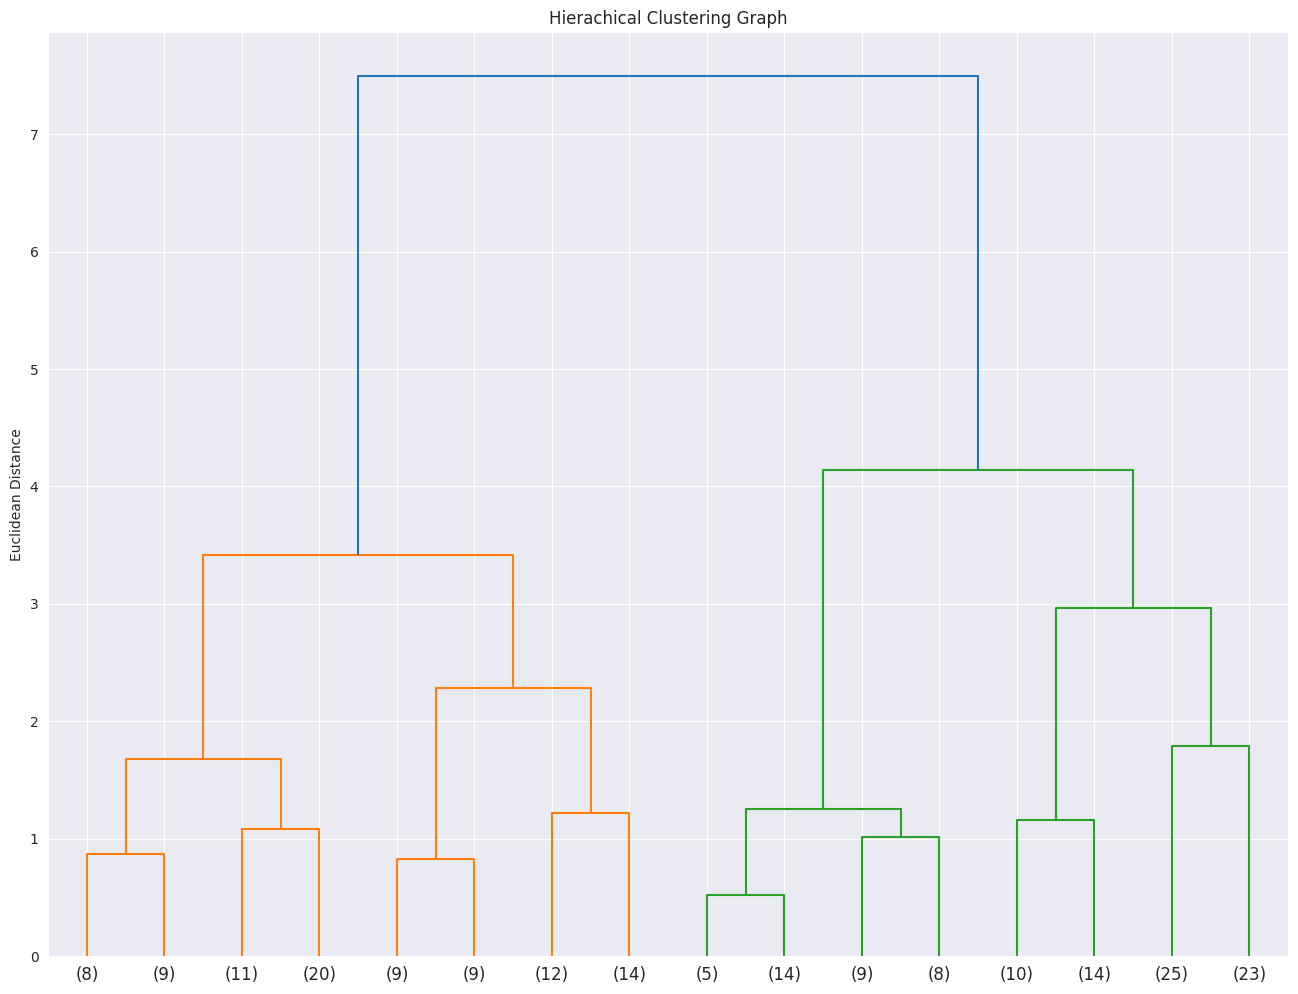

In [75]:
plot_dendrogram(x_df)

При проведении горизонтальной прямой на уровне синей линии получим 2 хороших кластера, при проведении горизонтальной линии на уровне от 3.6 до 4 получим 3 кластера, однако видно, что два кластера, полученные из зеленого разбиения очень похожи и могут быть объединены в один кластер без большого увеличения метрики расстояния.

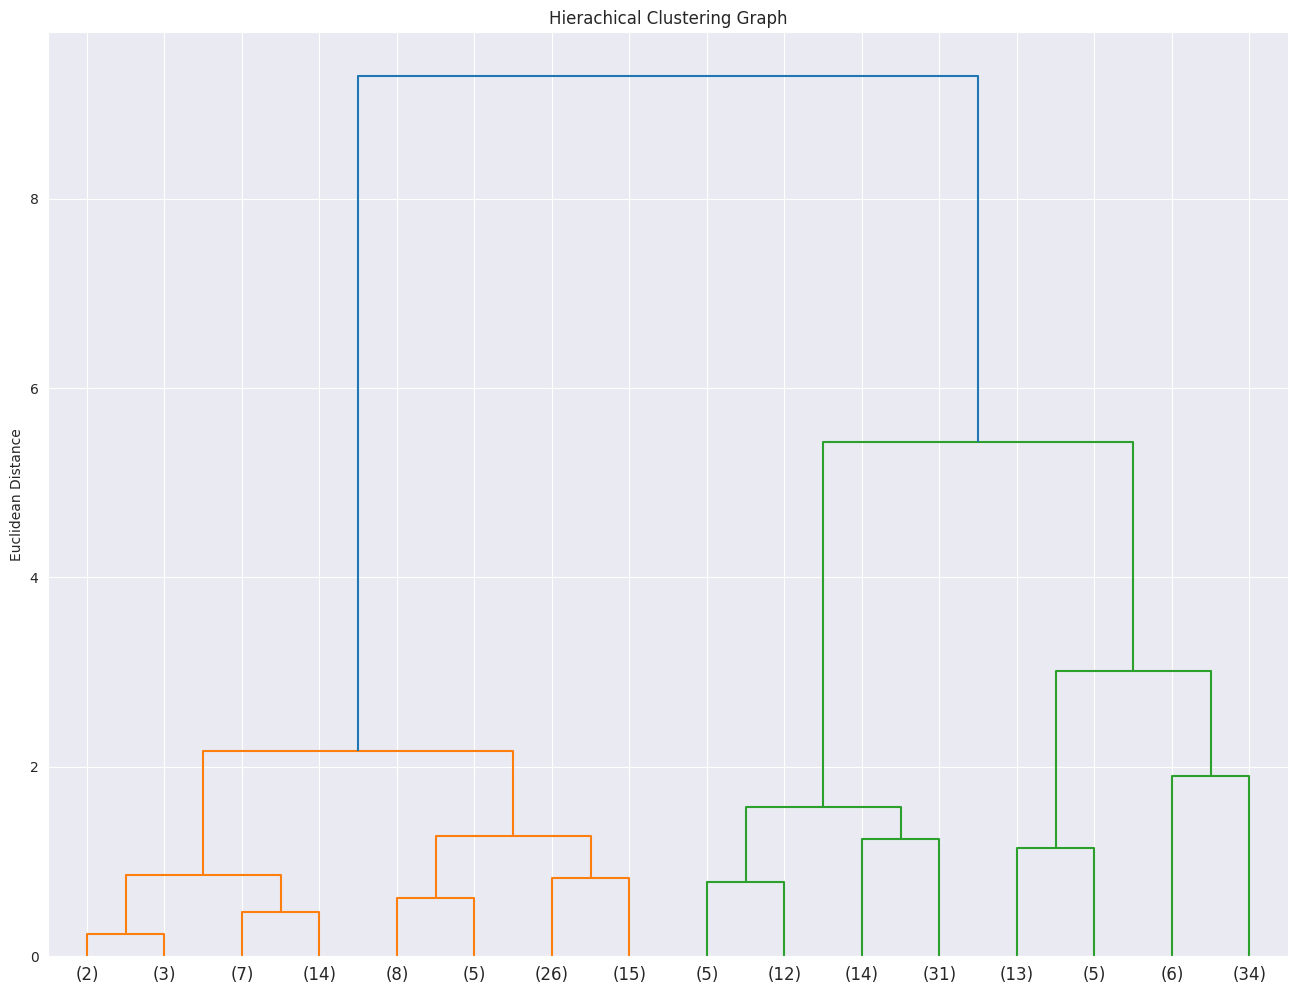

In [76]:
plot_dendrogram(y_df)

Для данных X наоборот, разделение на 3 кластера представляется наилучшим, так как при объединении их в 2 кластера максимальное евклидово расстояние зеленого кластера увеличивается с 3.5 до почти 6

#### Таким образом, мы правильно определили число кластеров = 2 для датасета X и число кластеров = 3 для датасета Y

### 3.2 Предложите (или найдите в литературе) какой-либо другой критерий качества кластеризации (отличный от модулярности). Сравните разбиения п.1.1 и п.2.1 по этому критерию. Дайте комментарий, как это согласуется с вашими выводами п.1.4 и п.2.4.

Воспользуемся коэфициентом Силуэтта. Коэффициент силуэта подходит для оценки кластеризации без знания истинных меток. Он вычисляется по формуле (b - a) / max (a,b), где a - среднее внутрекластерное расстояние, а b - среднее расстояние до ближайшего кластера. Кф. варьируется от -1 до 1, где большее значение соответствует лучшей кластеризации

In [77]:
from sklearn import metrics
for key, value in x_df_cluster_algo_2.items():
    test = metrics.silhouette_score(x_df_dist, value, metric='precomputed')
    print(f'{key}: silhouette_score = {test}')

k-means: silhouette_score = 0.0953695210900838
em: silhouette_score = 0.09512337538182694
single_linkage: silhouette_score = 0.10198675299473364
spectral: silhouette_score = 0.10198675299473364


In [78]:
from sklearn import metrics
for key, value in x_df_cluster_algo_3.items():
    test = metrics.silhouette_score(x_df_dist, value, metric='precomputed')
    print(f'{key}: silhouette_score = {test}')

k-means: silhouette_score = 0.13438721029480272
em: silhouette_score = 0.1320302261780129
single_linkage: silhouette_score = 0.1445146281852049
spectral: silhouette_score = 0.146274967878412


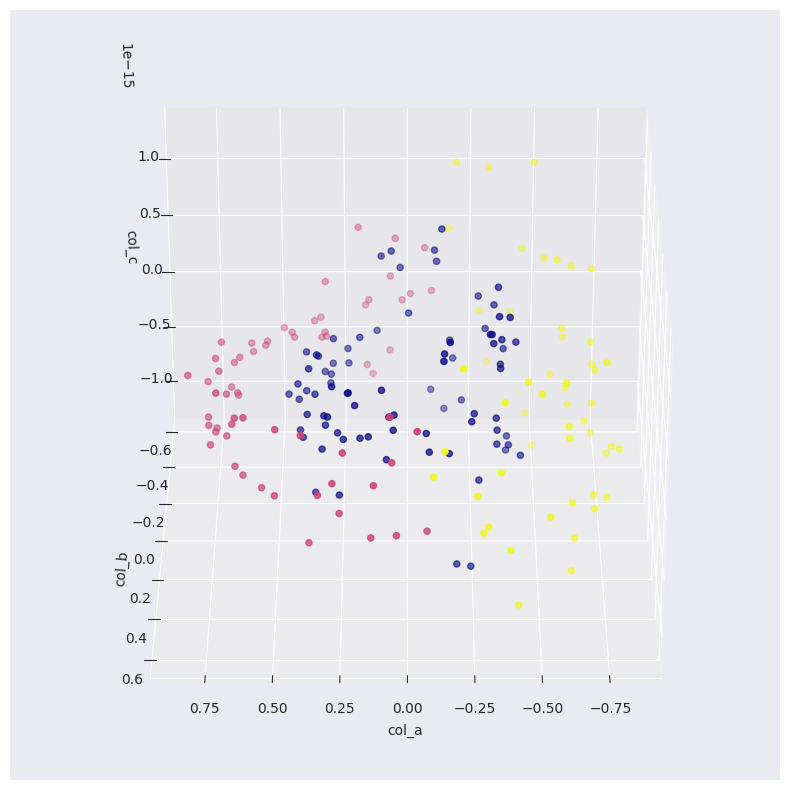

In [79]:
plot_3D(x_df_3d, 1, plot_cols=1, colors=x_df_spectral_3, angle=(30, 90))

Видим, что для датасета X коэффициент силуэта выбрал наилучшим разбиение на 3 кластера спектральным алгоритмом, что не согласуется с нашими выводами в предыдущих пунктах (о том что число кластеров = 2). Однако, ввиду того что различие в коэффициентах незначительно, сложно сделать какие-то существенные выводы. Если посмотреть на данные под определенным углом, то можно предположить, что разбиение на 3 кластера все-таки возможно

In [80]:
from sklearn import metrics
for key, value in y_df_cluster_algo_2.items():
    test = metrics.silhouette_score(y_df_dist, value, metric='precomputed')
    print(f'{key}: silhouette_score = {test}')

k-means: silhouette_score = 0.4125505818469023
em: silhouette_score = 0.4125505818469023
single_linkage: silhouette_score = 0.4125505818469023
spectral: silhouette_score = 0.4125505818469023


In [81]:
from sklearn import metrics
for key, value in y_df_cluster_algo_3.items():
    test = metrics.silhouette_score(y_df_dist, value, metric='precomputed')
    print(f'{key}: silhouette_score = {test}')

k-means: silhouette_score = 0.6034539316227122
em: silhouette_score = 0.6034539316227122
single_linkage: silhouette_score = 0.6034539316227122
spectral: silhouette_score = 0.6034539316227122




Для датасета Y коэффициент силуэта выбрал наилучшее разбиение на 3 кластера любым алгоритмом. Это согласуется с нашими выводами.